# Projet 4 :  Construisez un modèle de scoring
<font color = "grey"><i> Chargement des modules necessaires </i></font>



In [135]:
from collections import Counter
from imblearn.over_sampling import SMOTE

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import ipywidgets as widgets
import seaborn as sns
from IPython.core.display import display


from sklearn import preprocessing, metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures

from sklearn.preprocessing import  StandardScaler, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectFromModel, VarianceThreshold

from sklearn.metrics import roc_auc_score, f1_score, accuracy_score, precision_score, recall_score, \
    plot_confusion_matrix, auc, roc_curve, fbeta_score, classification_report, confusion_matrix, make_scorer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, cross_val_score
from sklearn.model_selection import  RepeatedStratifiedKFold,RandomizedSearchCV

from sklearn.linear_model import LogisticRegression, SGDClassifier, LinearRegression
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVR
from sklearn.utils import resample

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.decomposition import PCA

from sklearn.pipeline import  Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

import eli5
from eli5.sklearn import PermutationImportance
import shap
import pdp

## Sommaire
<h1><a href='#data_gen'>I.1) Présentation générale</a></h1>
    <h2><a href='#data_size'>I.2) Taille du jeu de données</a></h2>
    <h2><a href='#data_view'>I.3) Entrevue du jeu de données</a></h2>
    <h2><a href='#data_def'>I.4) Types de données et leurs effectif</a></h2>
    <h2><a href='#data_missing'>I.45)Effectif manquant</a></h2>


<h1><a href='#analy_uni'>II) Analyse Univariée</a></h1>
    <h2><a href='#analyse'>II.1.A)Analyse des variables</a></h2>
<h3><a href='#analy_imp'>II.1.A)Analyse des variables quantitatives</a></h3>
    <h4><a href='#analy_DAYS_BIRTH'>II.1.A.a) DAYS_BIRTH</a></h4>
    <h4><a href='#analy_DAYS_EMPLOYED'>II.1.A.b) DAYS_EMPLOYED</a></h4>
    <h4><a href='#analy_DAYS_REGISTRATION'>II.1.A.c) DAYS_REGISTRATION</a></h4>
    <h4><a href='#analy_DAYS_ID_PUBLISH'>II.1.A.d) DAYS_ID_PUBLISH</a></h4>
    <h4><a href='#analy_YEARS_BINNED'>II.1.A.e) YEARS_BINNED</a></h4>
    <h4><a href='#analy_CNT_CHILDREN'>II.1.A.f) CNT_CHILDREN</a></h4>
    <h4><a href='#analy_AMT_INCOME_TOTAL'>II.1.A.g) AMT_INCOME_TOTAL</a></h4>
    <h4><a href='#analy_AMT_CREDIT'>II.1.A.h) AMT_CREDIT</a></h4>
    <h4><a href='#analy_AMT_ANNUITY'>II.1.A.i) AMT_ANNUITY</a></h4>
    <h4><a href='#analy_AMT_GOODS_PRICE'>II.1.A.j) AMT_GOODS_PRICE</a></h4>
    <h4><a href='#analy_EXT_SOURCE_1'>II.1.A.k) EXT_SOURCE_1</a></h4>
    <h4><a href='#analy_EXT_SOURCE_2'>II.1.A.l) EXT_SOURCE_2</a></h4>
    <h4><a href='#analy_EXT_SOURCE_3'>II.1.A.m) EXT_SOURCE_3</a></h4>


<h3><a href='#analy_qua'>II.1.B)Analyse des variables qualitatives</a></h3>
    <h4><a href='#analy_TARGET'>II.1.B.a) TARGET</a></h4>
    <h4><a href='#analy_CODE_GENDER'>II.1.B.b) CODE_GENDER</a></h4>
    <h4><a href='#analy_NAME_CONTRACT_TYPE'>II.1.B.c) NAME_CONTRACT_TYPE</a></h4>
    <h4><a href='#analy_FLAG_OWN_CAR'>II.1.B.d) FLAG_OWN_CAR</a></h4>
    <h4><a href='#analy_FLAG_OWN_REALTY'>II.1.B.e) FLAG_OWN_REALTY</a></h4>
    <h4><a href='#analy_Label_encoding'>II.1.B.f) Label encoding</a></h4>


  <h2><a href='#analy_out'>II.2) identification de valeurs abérrante</a></h2>
  <h2><a href='#analy_dup'>II.3) Doublon</a></h2>
  <h2><a href='#analy_imp'>II.4) Imputation</a></h2>

<h1><a href='#analy_multy'>III) Analyse Multivarié</a></h1>
    <h2><a href='#analy_correl'>III.1) Corrélations</a></h2>

<h1><a href='#feature'>IV) Feature engineering</a></h1>

<h1><a href='#score'> V) Modèles de scoring des clients</a></h1>

<a id='data_gen'></a>
# I.1) Présentation générale

<font color = "grey"><i> Chargement du jeu de données </i></font>

In [136]:
data = pd.read_csv('data/application_train.csv')

<font color = "grey"><i> Chargement du style </i></font>

In [137]:
plt.style.use('ggplot')

<a id='data_size'></a>
## I.2) Taille du jeu de données
<font color = "cyan"><i> Apercu des permières lignes et colonnes </i></font>

In [138]:
df = data.copy()
print("Le jeu de données est composé de",df.shape[1],"colonnes ou attributs et ",df.shape[0]," lignes",)

Le jeu de données est composé de 122 colonnes ou attributs et  307511  lignes


<a id='data_size'></a>
## I.2) Entrevue du jeu de données
<font color = "cyan"><i> Apercu des permières lignes du jeu de données </i></font>

In [139]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


<a id='data_def'></a>
## I.3) Types de données et leurs effectif
<font color = "cyan"><i> affichage des type et de leurs effectif</i></font>

In [140]:
unsorted_df = pd.DataFrame({'colonne':df.dtypes.index,
              'Types':df.dtypes.values,
              'Effectif manquant':df.isna().sum().values,
              'Effectif manquant %':((df.isna().sum(axis = 0)/df.shape[0])*100).astype(float).values}).style.set_caption("Valeurs manquantes et leurs types")
unsorted_df

,colonne,Types,Effectif manquant,Effectif manquant %
0,SK_ID_CURR,int64,0,0.000000
1,TARGET,int64,0,0.000000
2,NAME_CONTRACT_TYPE,object,0,0.000000
3,CODE_GENDER,object,0,0.000000
4,FLAG_OWN_CAR,object,0,0.000000
5,FLAG_OWN_REALTY,object,0,0.000000
6,CNT_CHILDREN,int64,0,0.000000
7,AMT_INCOME_TOTAL,float64,0,0.000000
8,AMT_CREDIT,float64,0,0.000000
9,AMT_ANNUITY,float64,12,0.003902


In [141]:
pd.DataFrame({'colonne':df.dtypes.value_counts().index,'nombre':df.dtypes.value_counts().values}).style.set_caption("nombre de variable de chaque type")

,colonne,nombre
0,float64,65
1,int64,41
2,object,16


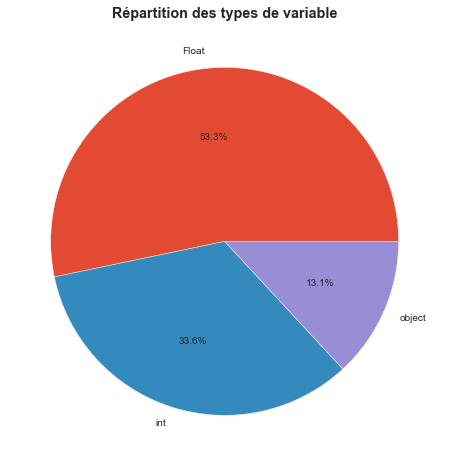

In [142]:
plt.figure(figsize=(8,8))
df.dtypes.value_counts().plot.pie(labels=['Float','int','object'],autopct='%1.1f%%')
plt.ylabel('')
plt.title("Répartition des types de variable",fontweight='bold')
plt.show()



<a id='data_missing'></a>
## I.4) Effectif manquant

<font color = "cyan"><i> Représentation graphique des valeurs manquantes </i></font>

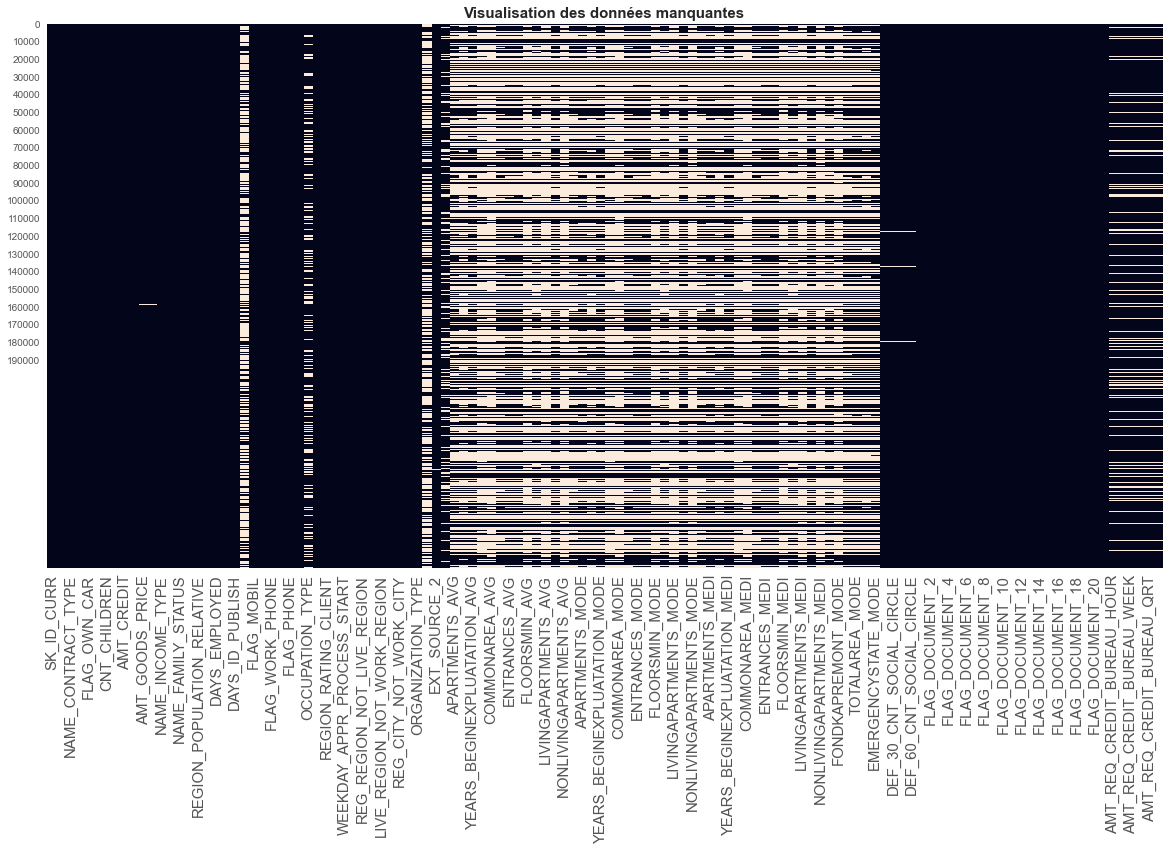

In [143]:
plt.figure(figsize=(20,10))
plt.title("Visualisation des données manquantes ",fontweight='bold',fontsize=15)
sns.heatmap(data.isna(), cbar=False)
plt.xticks(fontsize='15')
plt.yticks(np.arange(0,200000,10000),np.arange(0,200000,10000),fontsize='10')
plt.show()

<a id='analy_uni'>II.1) Etude Univariée</a>
# II) Analyse Univariée

<a id='analyse'></a>
## Analyse des variables
<font color = "cyan"><i> Répartition des variables</i></font>

In [144]:
pd.DataFrame({'colonne':df.dtypes.value_counts().index,'nombre':df.dtypes.value_counts().values}).style.set_caption("Caractéristiques des variables et leurs type / Feature types")

,colonne,nombre
0,float64,65
1,int64,41
2,object,16


<AxesSubplot:ylabel='None'>

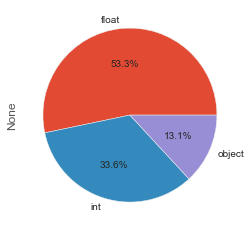

In [145]:
df.dtypes.value_counts().plot.pie(labels = ['float','int','object'],autopct='%1.1f%%')

<font color = "cyan"><i> Fonction pour décrire les varialbes </i></font>

In [146]:
def descrbibe_serie(data, col):

    data = data.describe()
    df1 = pd.DataFrame([('Skewness',df[col].skew()),('Kurtosis',df[col].kurt())],columns=('Caractéristiques','Valeurs'))
    df_ser = pd.DataFrame({'Caractéristiques':data.index,
               'Valeurs':data.values
               })

    df_ser = df_ser.append(df1,ignore_index=True)


    return df_ser.style.set_caption(f'Caractéristiques {col}')

In [147]:
def descrbibe_plot(data, col):
    sns.set_style("whitegrid")
    ax = sns.boxplot(x=data, palette="colorblind")


    plt.figure(figsize=(9, 8))
    sns.distplot((df["DAYS_BIRTH"] / -365), color='blue', kde=True)
    plt.title(f'Distribution de {col}')
    plt.ylabel("Fréquence de la donnée")
    plt.grid()
    plt.show()
    return

<a id='analy_imp'></a>
### II.1.A) Analyse des variables quantitatives
<font color = "cyan"><i> On va analyser une partie des variables quantitatives </i></font>

In [148]:
df.describe(include="all")



,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511,307511,307511,307511,307511.000000,3.075110e+05,3.075110e+05,307499.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
unique,NaN,NaN,2,3,2,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Cash loans,F,N,Y,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,278232,202448,202924,213312,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,278180.518577,0.080729,NaN,NaN,NaN,NaN,0.417052,1.687979e+05,5.990260e+05,27108.573909,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,NaN,NaN,NaN,NaN,0.722121,2.371231e+05,4.024908e+05,14493.737315,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,2.565000e+04,4.500000e+04,1615.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.125000e+05,2.700000e+05,16524.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.471500e+05,5.135310e+05,24903.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,NaN,NaN,NaN,NaN,1.000000,2.025000e+05,8.086500e+05,34596.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000


<a id='analy_DAYS_BIRTH'></a>
#### II.1.A.a) DAYS_BIRTH
<font color = "cyan"><i>La colonne DAYS_BIRTH contient des valeurs négatives correspondants au nombre de jours précédents la souscription du prêt pour avoir ces statistiques en jour on divise par -365:</i></font>

In [149]:
df_des = descrbibe_serie((df["DAYS_BIRTH"] / -365),'DAYS_BIRTH')
df_des

,Caractéristiques,Valeurs
0,count,307511.000000
1,mean,43.936973
2,std,11.956133
3,min,20.517808
4,25%,34.008219
5,50%,43.150685
6,75%,53.923288
7,max,69.120548
8,Skewness,-0.115673
9,Kurtosis,-1.049126


`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


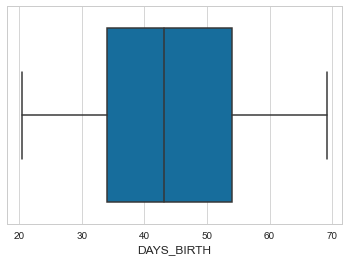

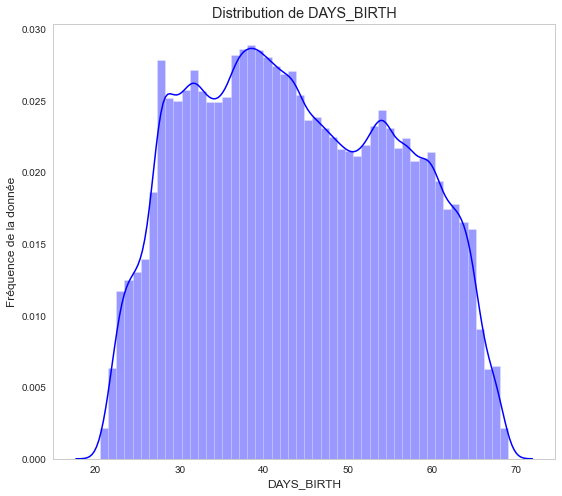

In [150]:
figu = descrbibe_plot((df["DAYS_BIRTH"] / -365),'DAYS_BIRTH')
figu

<a id='analy_DAYS_EMPLOYED'></a>
#### II.1.A.b) DAYS_EMPLOYED

In [151]:

df_des = descrbibe_serie(df["DAYS_EMPLOYED"],'DAYS_EMPLOYED')
df_des

,Caractéristiques,Valeurs
0,count,307511.000000
1,mean,63815.045904
2,std,141275.766519
3,min,-17912.000000
4,25%,-2760.000000
5,50%,-1213.000000
6,75%,-289.000000
7,max,365243.000000
8,Skewness,1.664346
9,Kurtosis,0.771612


`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


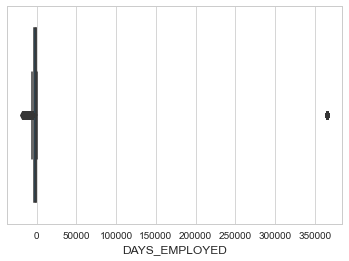

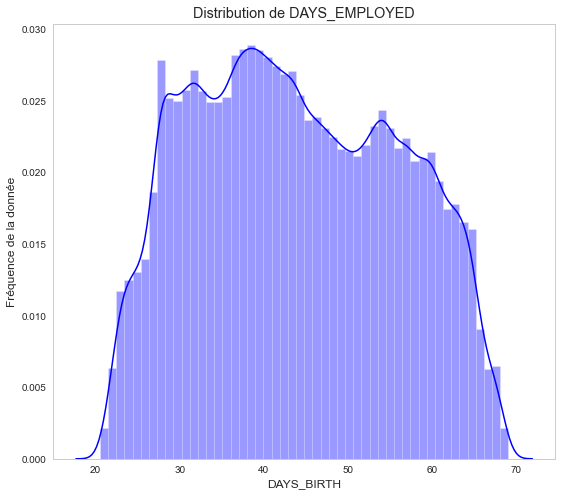

In [152]:
figu = descrbibe_plot(df["DAYS_EMPLOYED"],'DAYS_EMPLOYED')
figu

<a id='analy_DAYS_REGISTRATION'></a>
#### II.1.A.c) DAYS_REGISTRATION

In [153]:
df_des = descrbibe_serie(df["DAYS_REGISTRATION"],'DAYS_REGISTRATION')
df_des

,Caractéristiques,Valeurs
0,count,307511.000000
1,mean,-4986.120328
2,std,3522.886321
3,min,-24672.000000
4,25%,-7479.500000
5,50%,-4504.000000
6,75%,-2010.000000
7,max,0.000000
8,Skewness,-0.590872
9,Kurtosis,-0.321347


`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


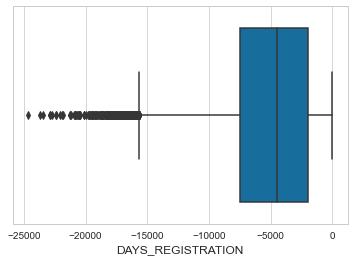

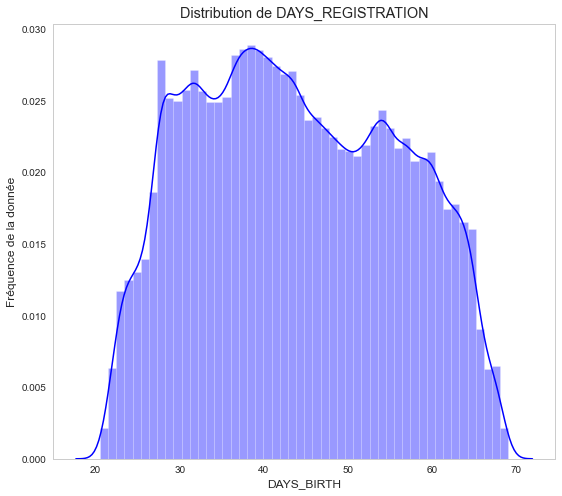

In [154]:
figu = descrbibe_plot(df["DAYS_REGISTRATION"],'DAYS_REGISTRATION')
figu

<a id='analy_DAYS_ID_PUBLISH'></a>
#### II.1.A.d) DAYS_ID_PUBLISH

In [155]:
df_des = descrbibe_serie(df["DAYS_ID_PUBLISH"],'DAYS_ID_PUBLISH')
df_des

,Caractéristiques,Valeurs
0,count,307511.000000
1,mean,-2994.202373
2,std,1509.450419
3,min,-7197.000000
4,25%,-4299.000000
5,50%,-3254.000000
6,75%,-1720.000000
7,max,0.000000
8,Skewness,0.349327
9,Kurtosis,-1.106808


`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


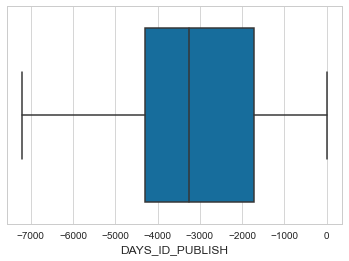

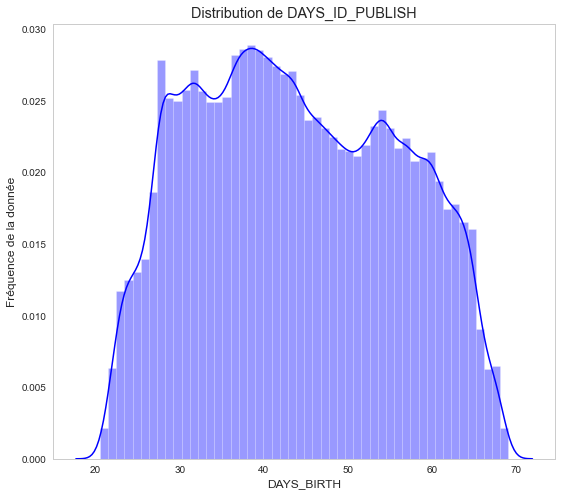

In [156]:
figu = descrbibe_plot(df["DAYS_ID_PUBLISH"],'DAYS_ID_PUBLISH')
figu

<a id='analy_YEARS_BINNED'></a>
#### II.1.A.e) YEARS_BINNED

In [157]:
"""


df_des = descrbibe_serie(df["YEARS_BINNED"],'YEARS_BINNED')
df_des



figu = descrbibe_plot(df["YEARS_BINNED"],'YEARS_BINNED')
figu
"""

'\n\n\ndf_des = descrbibe_serie(df["YEARS_BINNED"],\'YEARS_BINNED\')\ndf_des\n\n\n\nfigu = descrbibe_plot(df["YEARS_BINNED"],\'YEARS_BINNED\')\nfigu\n'

<a id='analy_CNT_CHILDREN'></a>
#### II.1.A.f) CNT_CHILDREN

In [158]:
df_des = descrbibe_serie(df["CNT_CHILDREN"],'CNT_CHILDREN')
df_des

,Caractéristiques,Valeurs
0,count,307511.000000
1,mean,0.417052
2,std,0.722121
3,min,0.000000
4,25%,0.000000
5,50%,0.000000
6,75%,1.000000
7,max,19.000000
8,Skewness,1.974604
9,Kurtosis,7.904106


`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


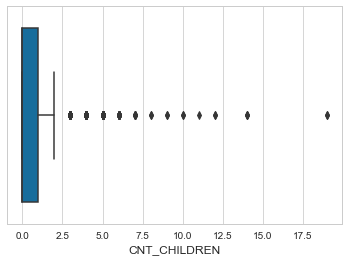

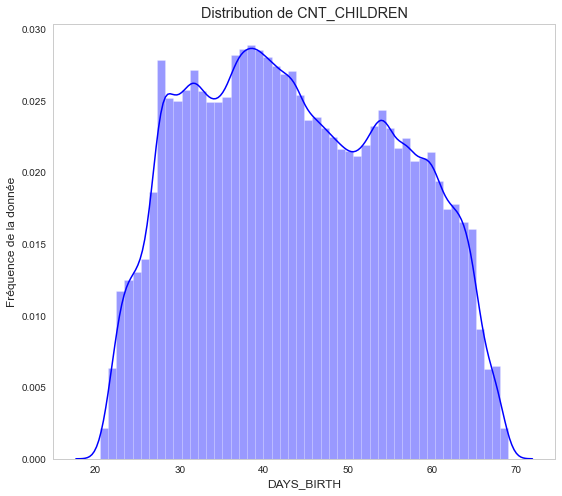

In [159]:
figu = descrbibe_plot(df["CNT_CHILDREN"],'CNT_CHILDREN')
figu

<a id='analy_AMT_INCOME_TOTAL'></a>
#### II.1.A.g) AMT_INCOME_TOTAL

In [160]:
df_des = descrbibe_serie(df["AMT_INCOME_TOTAL"],'AMT_INCOME_TOTAL')
df_des

,Caractéristiques,Valeurs
0,count,307511.000000
1,mean,168797.919297
2,std,237123.146279
3,min,25650.000000
4,25%,112500.000000
5,50%,147150.000000
6,75%,202500.000000
7,max,117000000.000000
8,Skewness,391.559654
9,Kurtosis,191786.554381


`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


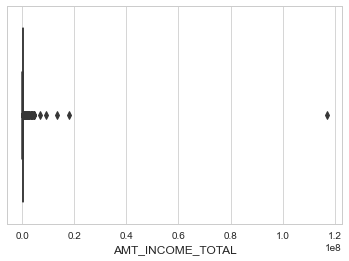

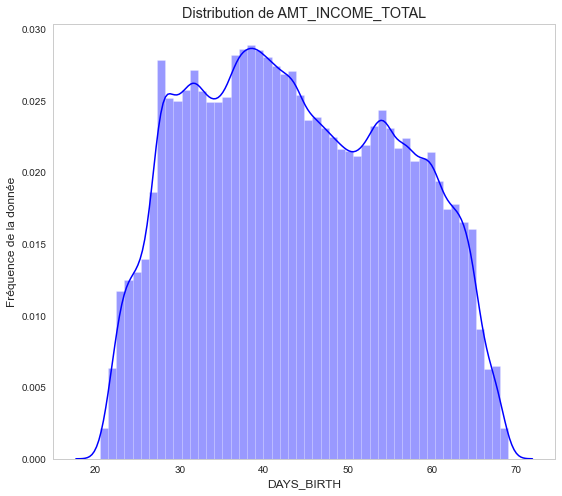

In [161]:
figu = descrbibe_plot(df["AMT_INCOME_TOTAL"],'AMT_INCOME_TOTAL')
figu

<a id='analy_AMT_CREDIT'></a>
#### II.1.A.h) AMT_CREDIT

In [162]:
df_des = descrbibe_serie(df["AMT_CREDIT"],'AMT_CREDIT')
df_des

,Caractéristiques,Valeurs
0,count,307511.000000
1,mean,599025.999706
2,std,402490.776996
3,min,45000.000000
4,25%,270000.000000
5,50%,513531.000000
6,75%,808650.000000
7,max,4050000.000000
8,Skewness,1.234778
9,Kurtosis,1.934041


`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


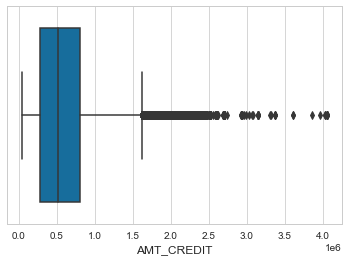

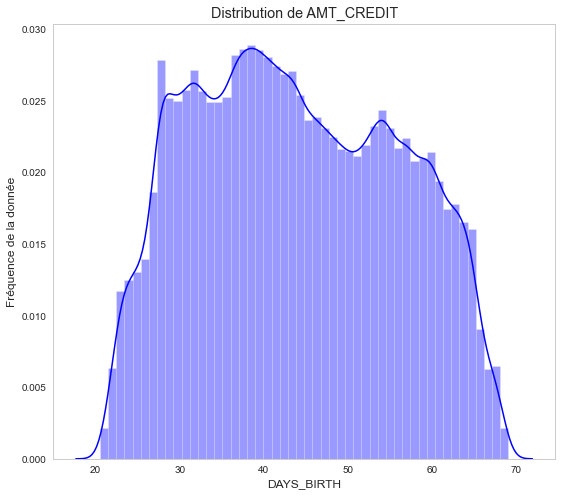

In [163]:
figu = descrbibe_plot(df["AMT_CREDIT"],'AMT_CREDIT')
figu

<a id='analy_AMT_ANNUITY'></a>
#### II.1.A.i) AMT_ANNUITY

In [164]:
df_des = descrbibe_serie(df["AMT_ANNUITY"],'AMT_ANNUITY')
df_des

,Caractéristiques,Valeurs
0,count,307499.000000
1,mean,27108.573909
2,std,14493.737315
3,min,1615.500000
4,25%,16524.000000
5,50%,24903.000000
6,75%,34596.000000
7,max,258025.500000
8,Skewness,1.579777
9,Kurtosis,7.707320


`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


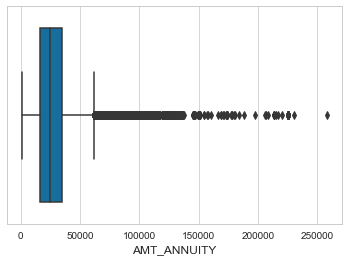

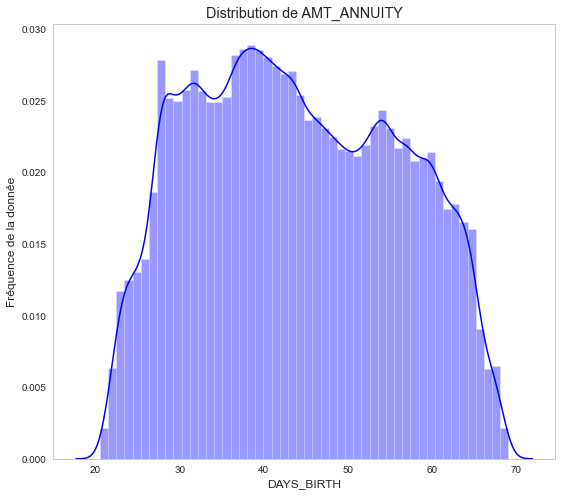

In [165]:
figu = descrbibe_plot(df["AMT_ANNUITY"],'AMT_ANNUITY')
figu

<a id='analy_AMT_GOODS_PRICE'></a>
#### II.1.A.j) AMT_GOODS_PRICE

In [166]:
df_des = descrbibe_serie(df["AMT_GOODS_PRICE"],'AMT_GOODS_PRICE')
df_des

,Caractéristiques,Valeurs
0,count,307233.000000
1,mean,538396.207429
2,std,369446.460540
3,min,40500.000000
4,25%,238500.000000
5,50%,450000.000000
6,75%,679500.000000
7,max,4050000.000000
8,Skewness,1.349000
9,Kurtosis,2.431916


`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


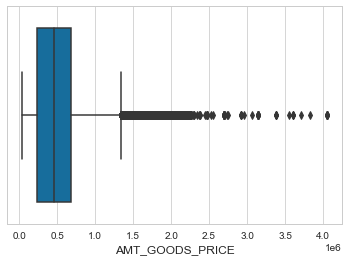

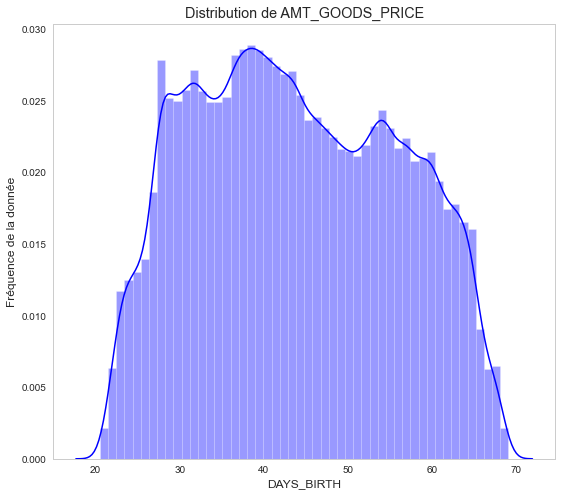

In [167]:
figu = descrbibe_plot(df["AMT_GOODS_PRICE"],'AMT_GOODS_PRICE')
figu

<a id='analy_EXT_SOURCE_1'></a>
#### II.1.A.k) EXT_SOURCE_1

In [168]:
df_des = descrbibe_serie(df["EXT_SOURCE_1"],'EXT_SOURCE_1')
df_des

,Caractéristiques,Valeurs
0,count,134133.000000
1,mean,0.502130
2,std,0.211062
3,min,0.014568
4,25%,0.334007
5,50%,0.505998
6,75%,0.675053
7,max,0.962693
8,Skewness,-0.068755
9,Kurtosis,-0.965155


`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


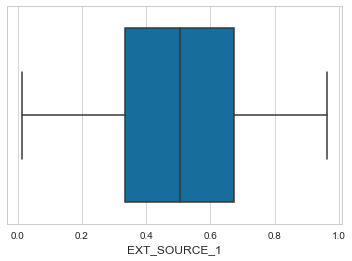

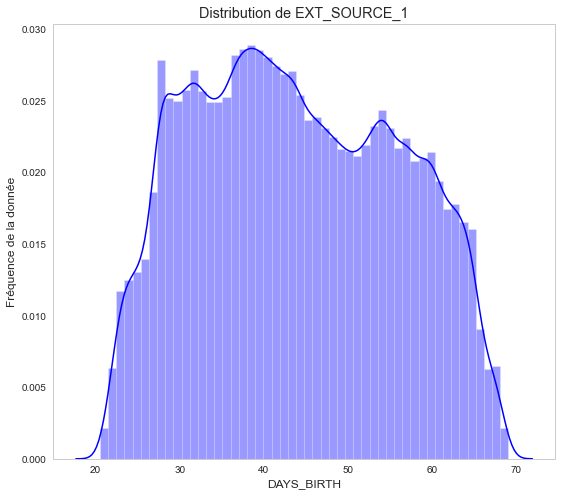

In [169]:
figu = descrbibe_plot(df["EXT_SOURCE_1"],'EXT_SOURCE_1')
figu

<a id='analy_EXT_SOURCE_2'></a>
#### II.1.A.l) EXT_SOURCE_2

In [170]:
df_des = descrbibe_serie(df["EXT_SOURCE_2"],'EXT_SOURCE_2')
df_des

,Caractéristiques,Valeurs
0,count,306851.000000
1,mean,0.514393
2,std,0.191060
3,min,0.000000
4,25%,0.392457
5,50%,0.565961
6,75%,0.663617
7,max,0.855000
8,Skewness,-0.793576
9,Kurtosis,-0.269131


`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


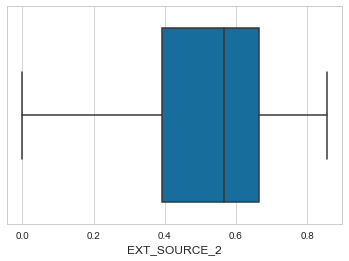

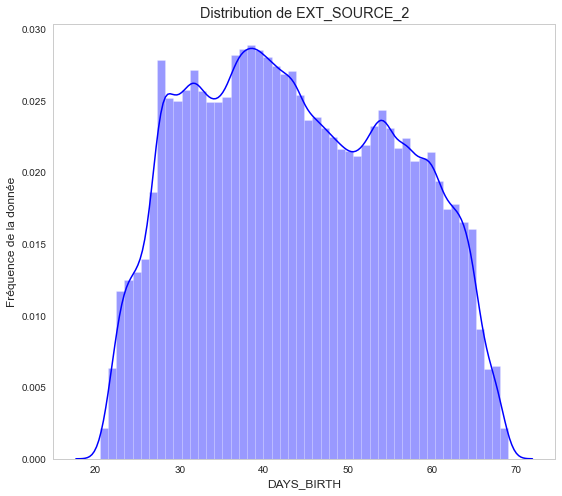

In [171]:
figu = descrbibe_plot(df["EXT_SOURCE_2"],'EXT_SOURCE_2')
figu

<a id='analy_EXT_SOURCE_3'></a>
#### II.1.A.m) EXT_SOURCE_3

In [172]:
df_des = descrbibe_serie(df["EXT_SOURCE_3"],'EXT_SOURCE_3')
df_des

,Caractéristiques,Valeurs
0,count,246546.000000
1,mean,0.510853
2,std,0.194844
3,min,0.000527
4,25%,0.370650
5,50%,0.535276
6,75%,0.669057
7,max,0.896010
8,Skewness,-0.409390
9,Kurtosis,-0.663463


`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


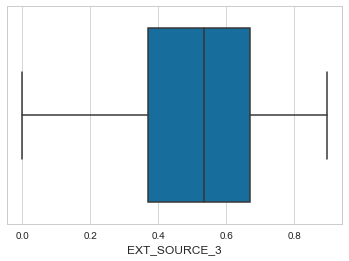

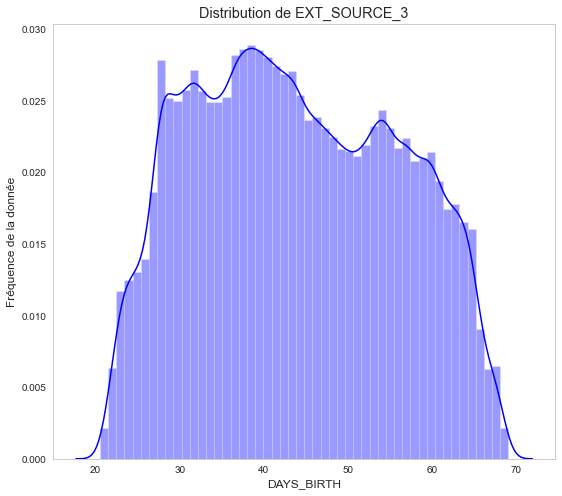

In [173]:
figu = descrbibe_plot(df["EXT_SOURCE_3"],'EXT_SOURCE_3')
figu

<a id='analy_qua'></a>
### II.1.A) Analyse des variables qualitatives

In [174]:

df.select_dtypes('object').apply(pd.Series.nunique, axis=0)
df2 = pd.DataFrame([('TARGET',df['TARGET'].nunique() )],
                   columns=('Colonnes','Unique'))
df_qua = pd.DataFrame({'Colonnes':(df.select_dtypes('object').apply(pd.Series.nunique,axis=0)).index,
               'Unique':(df.select_dtypes('object').apply(pd.Series.nunique,
                                         axis=0)).values
               })

df_qua = df_qua.append(df2,ignore_index=True)
df_qua

def show_diag( data, col):
    labels = data[col].value_counts().index
    plt.figure(figsize=(8,8))
    plt.pie(x= data[col].value_counts().values ,labels=labels,autopct='%1.1f%%')
    plt.ylabel('')
    plt.title("Répartition des types de variable",fontweight='bold')
    plt.show()

    plt.figure(figsize=(12, 10))

    sns.countplot(x=col, data=data,
                  order=data[col].value_counts().index , hue = col, palette = "colorblind")
    plt.title(f'Distribution de {col}')
    plt.ylabel(f'Fréquence de {col}')
    plt.xlabel(f'Valeurs de la {col}')
    plt.show()
    return

<a id='analy_TARGET'></a>
#### II.1.B.a) TARGET

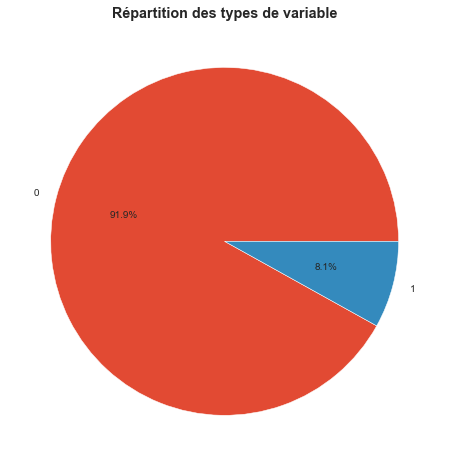

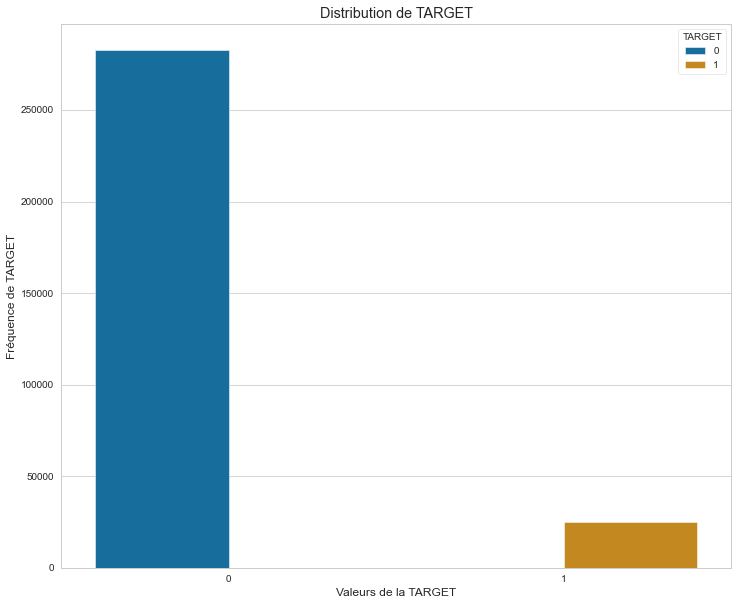

In [175]:

show_diag(df,"TARGET")

<a id='analy_CODE_GENDER'></a>
#### II.1.B.b) CODE_GENDER

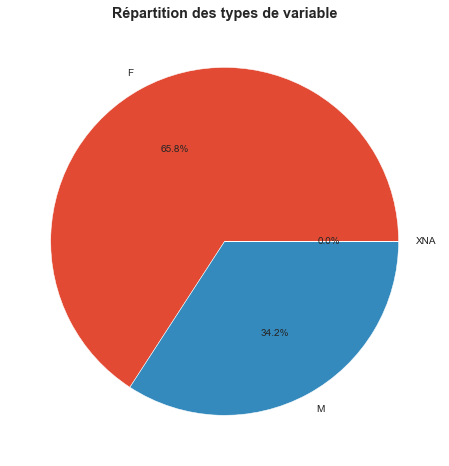

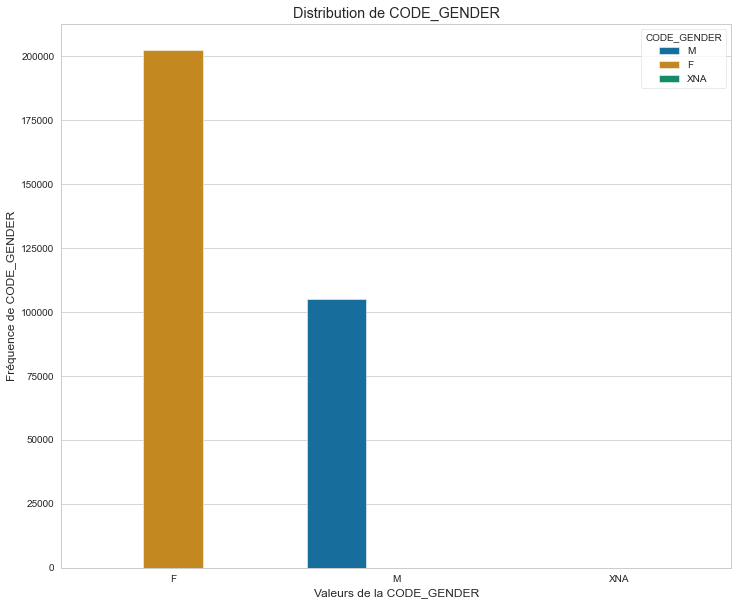

In [176]:
show_diag(df,"CODE_GENDER")

<a id='analy_NAME_CONTRACT_TYPE'></a>
#### II.1.B.c) NAME_CONTRACT_TYPE

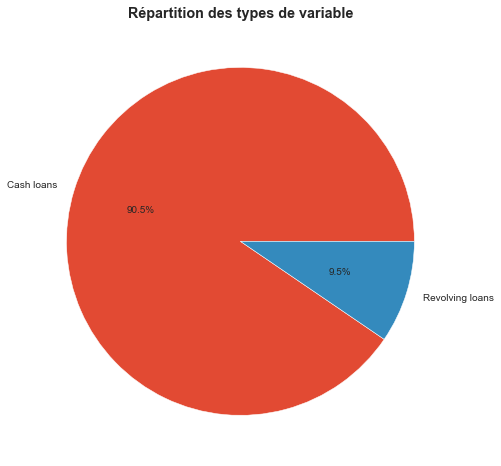

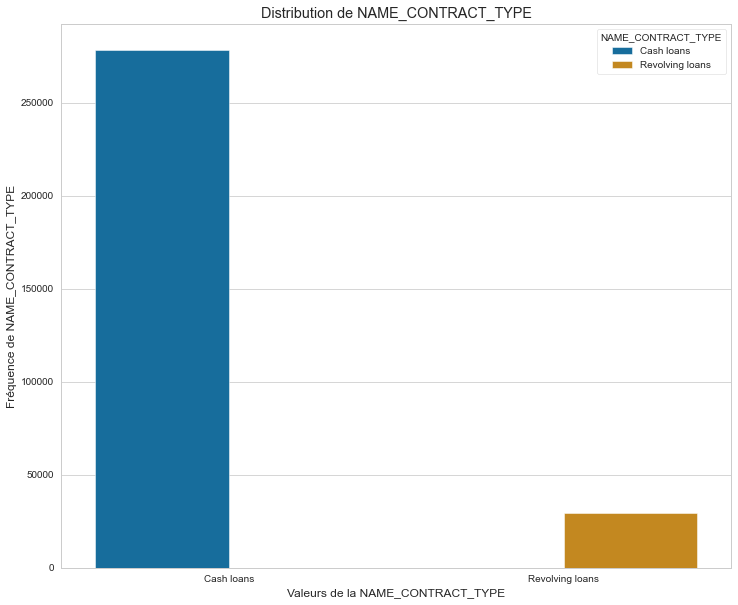

In [177]:
show_diag(df,"NAME_CONTRACT_TYPE")

<a id='analy_FLAG_OWN_CAR'></a>
#### II.1.B.d) FLAG_OWN_CAR

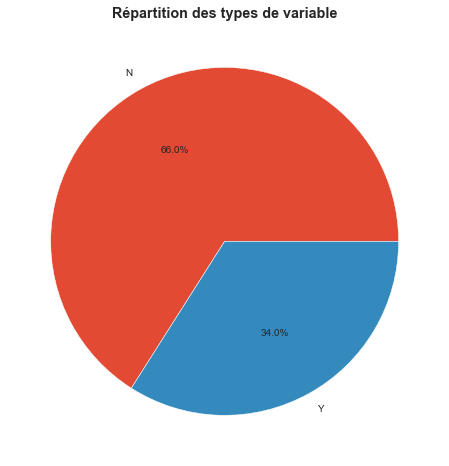

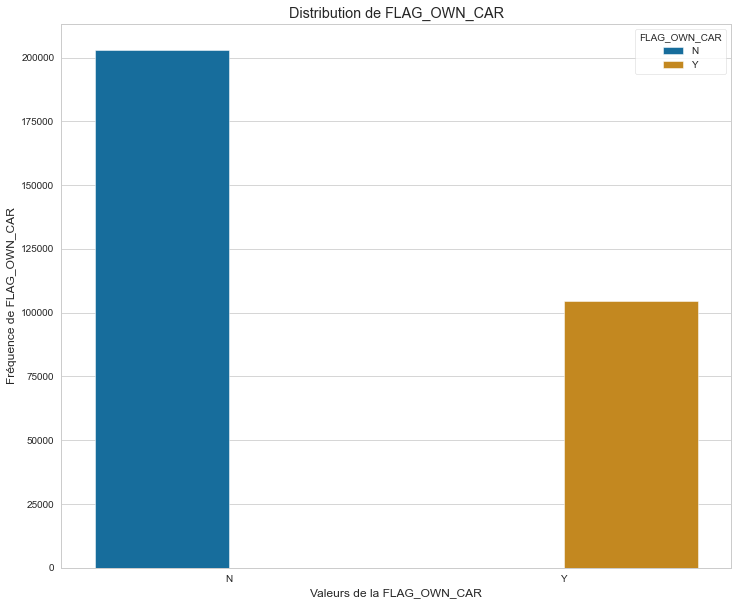

In [178]:

show_diag(df,"FLAG_OWN_CAR")

<a id='analy_FLAG_OWN_REALTY'></a>
#### II.1.B.e) FLAG_OWN_REALTY

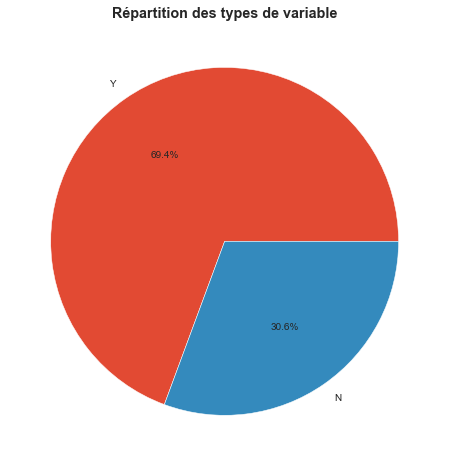

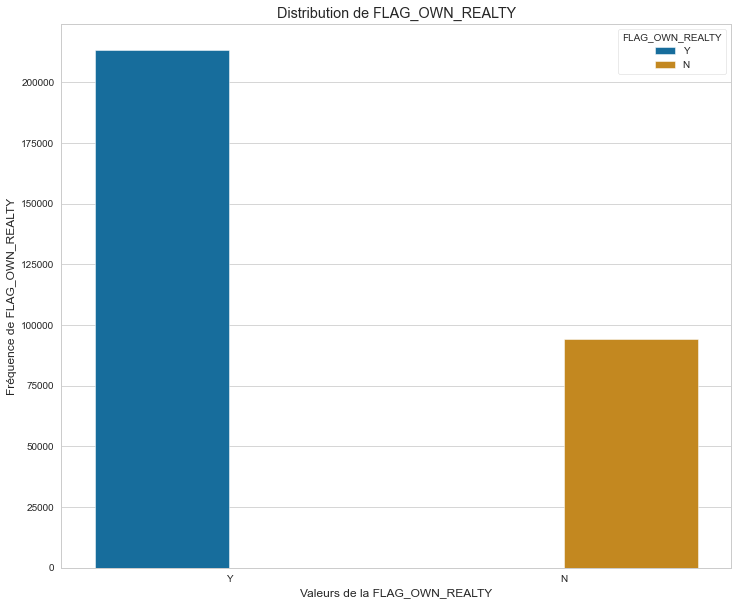

In [179]:
show_diag(df,"FLAG_OWN_REALTY")

<a id='analy_Label_encoding'></a>
#### II.1.B.e) Label encoding
<font color = "cyan"><i>Conversion des données des colonnes catégorielles en données numériques pour etre exploitable par le modele machine learning </i></font>

In [180]:
le = LabelEncoder()
le_count = 0

for col in df:
    if df[col].dtype == 'object':
        if len(list(df[col].unique())) <= 2:
            le.fit(df[col])
            df[col] = le.transform(df[col])
            le_count += 1
            print(f'La colonne {col} à été encodé')

print('%d colonnes avec la méthode label encoded.' % le_count)

La colonne NAME_CONTRACT_TYPE à été encodé
La colonne FLAG_OWN_CAR à été encodé
La colonne FLAG_OWN_REALTY à été encodé
3 colonnes avec la méthode label encoded.


* One-hot encoding pour les variables qualitatives avec plus de 2 catégories :

In [181]:
df = pd.get_dummies(df)

print('Dimension du fichier train : ', df.shape)
print(df.columns)

Dimension du fichier train :  (307511, 243)
Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       ...
       'HOUSETYPE_MODE_terraced house', 'WALLSMATERIAL_MODE_Block',
       'WALLSMATERIAL_MODE_Mixed', 'WALLSMATERIAL_MODE_Monolithic',
       'WALLSMATERIAL_MODE_Others', 'WALLSMATERIAL_MODE_Panel',
       'WALLSMATERIAL_MODE_Stone, brick', 'WALLSMATERIAL_MODE_Wooden',
       'EMERGENCYSTATE_MODE_No', 'EMERGENCYSTATE_MODE_Yes'],
      dtype='object', length=243)


<a id='analy_out'></a>
##  II.2) identification de valeurs abérrante

In [182]:
suspected_outliers = ['DAYS_EMPLOYED',
                        'OBS_30_CNT_SOCIAL_CIRCLE',
                        'DEF_30_CNT_SOCIAL_CIRCLE',
                        'OBS_60_CNT_SOCIAL_CIRCLE',
                        'DEF_60_CNT_SOCIAL_CIRCLE',
                        'AMT_REQ_CREDIT_BUREAU_HOUR',
                        'AMT_REQ_CREDIT_BUREAU_DAY',
                        'AMT_REQ_CREDIT_BUREAU_WEEK',
                        'AMT_REQ_CREDIT_BUREAU_MON',
                        'AMT_REQ_CREDIT_BUREAU_QRT',
                        'AMT_REQ_CREDIT_BUREAU_YEAR',
                        'HOUR_APPR_PROCESS_START'
                   ]

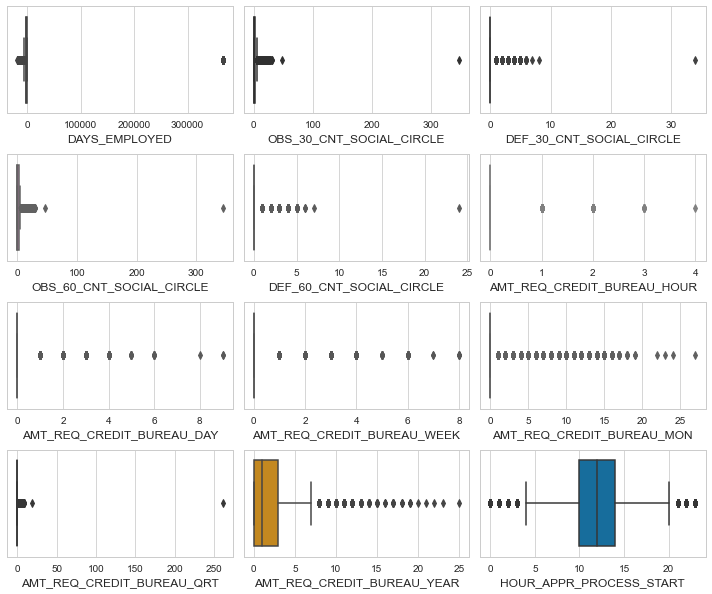

In [183]:
i=0
colors = sns.color_palette("colorblind", 14)
plt.figure(figsize=(10,10))
for col in suspected_outliers:
    i+=1
    plt.subplot(5,3,i)
    sns.boxplot(x=df[col],color=colors[i%12])
plt.tight_layout()

In [184]:
#Identification et suppression des outliers sur la regle des quantiles
def outliers_remover(data,col):
    Quant = data[col].quantile([0.25,0.5,0.75]).values #Calcul des quantiles

    if int(Quant[2]) == 0:
        print(f'pas de traitement car Q3=0')
        return data
    else:
        n=data[(data[col]<0) | (data[col]>=(Quant[1]+1.5*Quant[2]))].shape[0] # nombre d'outliers
        print(f'traitement de la colonne {col} il y a {n} individus avec une valeur en dehors de l\'interval [0,{Quant[1]+1.5*Quant[2]}]')
        return data[(data[col]>= 0) & (data[col]<Quant[1]+1.5*Quant[2]) | (data[col].isna())]

In [185]:
df_out=outliers_remover(df,'DAYS_EMPLOYED')
df_out.head()
anom_train = df[df["DAYS_EMPLOYED"] == 365243]

print('Il y a %d lignes dans le fichier train dont le nombre de jours depuis l\'embauche est anormale' % len(anom_train))

traitement de la colonne DAYS_EMPLOYED il y a 307511 individus avec une valeur en dehors de l'interval [0,-1646.5]
Il y a 55374 lignes dans le fichier train dont le nombre de jours depuis l'embauche est anormale


> On remplace les valeurs aberrantes de la colonne par NaN dans les fichiers train et test:

In [186]:
df['DAYS_EMPLOYED_ANOM'] = df["DAYS_EMPLOYED"] == 365243
df['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace=True)

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


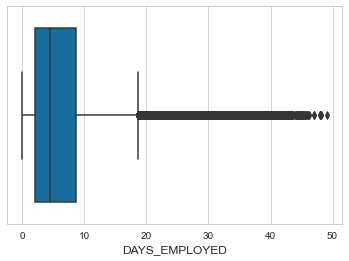

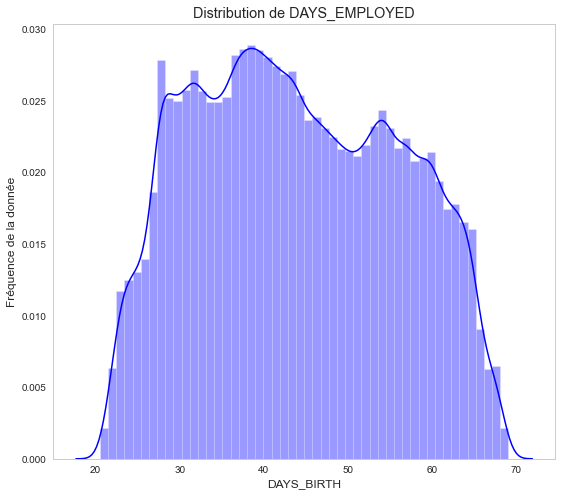

In [187]:
figu = descrbibe_plot((df["DAYS_EMPLOYED"] / -365),'DAYS_EMPLOYED')

In [188]:
df_des = descrbibe_serie(df["DAYS_EMPLOYED"]/-365,'DAYS_EMPLOYED')
df_des

,Caractéristiques,Valeurs
0,count,252137.000000
1,mean,6.531971
2,std,6.406466
3,min,-0.000000
4,25%,2.101370
5,50%,4.515068
6,75%,8.698630
7,max,49.073973
8,Skewness,-1.968316
9,Kurtosis,4.752652


<a id='analy_dup'></a>
## II.3) Doublon

In [189]:
print(df.duplicated(df.columns[1:]).value_counts())

False    307511
dtype: int64


<font color = "cyan"><i>Nous remarquons qu'il il ya autant d'id que de target et qu'auncun d'entre eux ne partagent les mêmes valeurs.Donc il n'y a pas de doublon </i></font>

In [190]:
doublons_df = df[df.duplicated(keep='first')]

In [191]:
doublons_df.shape


(0, 244)

<font color = "grey"><i> suppression des doublons du dataset  </i></font>

In [192]:
df= df.drop(index = doublons_df.index)

<a id='analy_imp'></a>
## II.3) Imputation
<font color = "grey"><i> Imputation des valeurs manquantes par la médiane  </i></font>



In [193]:

imputer = SimpleImputer(strategy='median')
imputer.fit(df)
imputed = imputer.transform(df)
print(type(imputed))



df_imputed = pd.DataFrame(imputed, columns=df.columns)
df_imputed.shape
df_imputed.head()

<class 'numpy.ndarray'>


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,DAYS_EMPLOYED_ANOM
0,100002.0,1.0,0.0,0.0,1.0,0.0,202500.0,406597.5,24700.5,351000.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,100003.0,0.0,0.0,0.0,0.0,0.0,270000.0,1293502.5,35698.5,1129500.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,100004.0,0.0,1.0,1.0,1.0,0.0,67500.0,135000.0,6750.0,135000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006.0,0.0,0.0,0.0,1.0,0.0,135000.0,312682.5,29686.5,297000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007.0,0.0,0.0,0.0,1.0,0.0,121500.0,513000.0,21865.5,513000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<font color = "grey"><i> enregisytrement du dataset  </i></font>

In [194]:
df_imputed.to_pickle('data/app_data_train')


<font color = "cyan"><i> Représentation graphique des valeurs manquantes après imputation  </i></font>

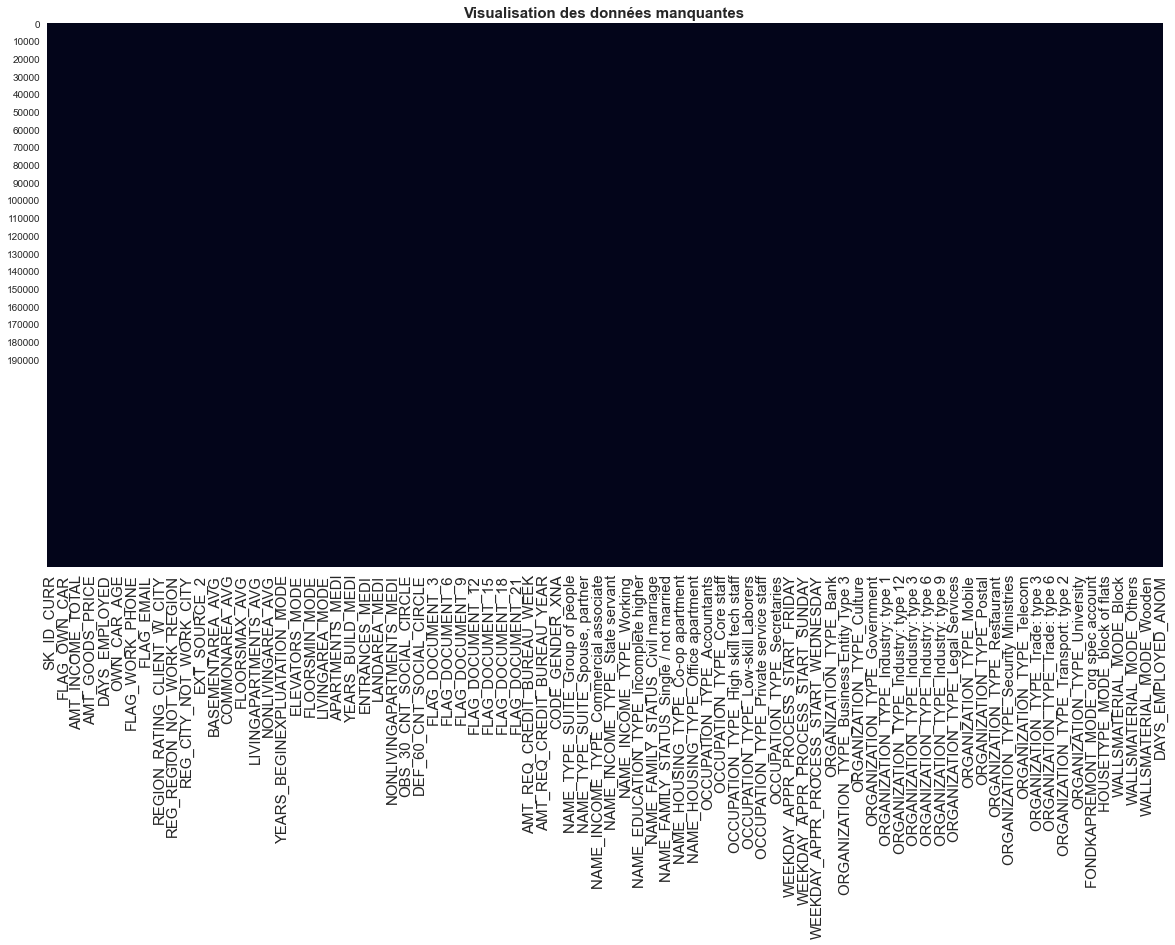

In [195]:
plt.figure(figsize=(20,10))
plt.title("Visualisation des données manquantes ",fontweight='bold',fontsize=15)
sns.heatmap(df_imputed.isna(), cbar=False)
plt.xticks(fontsize='15')
plt.yticks(np.arange(0,200000,10000),np.arange(0,200000,10000),fontsize='10')
plt.show()

<a id='analy_multy'></a>
# III) Analyse Multivarié

<a id='analy_correl'></a>
## III.1) Corrélations

In [196]:
df_num = df.select_dtypes(include=['float64','int64'])
df_corr = df_num.corr()
df_corr.sort_values(by ='TARGET',
                      axis=0,
                      ascending=True,

                      kind='quicksort',)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
EXT_SOURCE_3,0.000222,-0.178919,-0.042710,-0.030229,0.043516,0.030752,0.047717,-0.006001,-0.205478,-0.129722,...,-0.016152,-0.002590,-0.013837,-0.013058,-0.001193,-0.007190,-0.021258,-0.007856,-0.025131,-0.071449
EXT_SOURCE_2,0.002342,-0.160472,-0.018015,0.060925,0.131228,0.125804,0.139367,0.198924,-0.091996,-0.093444,...,0.001874,0.003256,0.000614,-0.007236,-0.004077,0.000553,0.001507,0.051981,-0.002849,-0.021984
EXT_SOURCE_1,0.000082,-0.155317,-0.138470,0.026232,0.168429,0.119398,0.175502,0.099997,-0.600610,-0.252712,...,-0.025739,0.005131,-0.005102,-0.019208,-0.003963,-0.005087,-0.001801,0.030820,-0.003631,0.006562
FLOORSMAX_AVG,0.004851,-0.044003,-0.009705,0.060171,0.103296,0.130174,0.108512,0.322652,0.001634,0.004666,...,0.012230,0.000900,-0.002702,-0.005814,0.003101,0.002946,-0.000050,0.046762,-0.000841,-0.019750
FLOORSMAX_MEDI,0.004588,-0.043768,-0.009447,0.059682,0.102770,0.129179,0.107936,0.318319,0.001791,0.004555,...,0.012105,0.000879,-0.002662,-0.005831,0.003301,0.002752,0.000082,0.045992,-0.000724,-0.019865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
REGION_RATING_CLIENT,-0.001075,0.058899,0.025423,-0.085465,-0.101776,-0.128525,-0.103786,-0.532877,0.009361,-0.010755,...,-0.012532,-0.001205,0.002217,-0.001887,0.006312,-0.002241,0.001683,-0.069712,0.005436,0.011494
REGION_RATING_CLIENT_W_CITY,-0.001138,0.060893,0.024781,-0.091735,-0.110915,-0.141682,-0.112208,-0.531535,0.008073,-0.009311,...,-0.013672,-0.001530,0.002609,-0.001501,0.006239,-0.001953,0.001102,-0.067741,0.004773,0.010683
DAYS_EMPLOYED,-0.000084,0.074958,0.061145,-0.013005,-0.091295,-0.053604,-0.093374,0.004155,0.352321,1.000000,...,0.009534,0.000449,0.003042,0.012101,-0.000477,0.002090,0.002171,-0.024433,0.006567,-0.000527
DAYS_BIRTH,-0.001500,0.078239,0.330938,0.027261,-0.055436,0.009445,-0.053442,-0.029582,1.000000,0.352321,...,0.044498,0.003614,0.009015,0.027282,0.005285,0.002255,-0.001336,0.001372,-0.011799,-0.071983


<font color = "cyan"><i> indication pour la corrélation  </i></font>

| 0.00 - 0.19 | très faible |
|-------------|-------------|
| 0.20 - 0.39 | faible      |
| 0.40 - 0.59 | modéré      |
| 0.60 - 0.79 | fort        |
| 0.80 - 1.00 | très fort   |


In [197]:
correlations = df.corr()['TARGET'].sort_values(ascending=True)

In [198]:
df_corr_pos = pd.DataFrame({'Colonnes':correlations.tail(15).index,
               'Valeurs':correlations.tail(15).values
               })
df_corr_pos.style.set_caption("Fortes corrélations positives")

,Colonnes,Valeurs
0,OCCUPATION_TYPE_Laborers,0.043019
1,FLAG_DOCUMENT_3,0.044346
2,REG_CITY_NOT_LIVE_CITY,0.044395
3,FLAG_EMP_PHONE,0.045982
4,NAME_EDUCATION_TYPE_Secondary / secondary special,0.049824
5,REG_CITY_NOT_WORK_CITY,0.050994
6,DAYS_ID_PUBLISH,0.051457
7,CODE_GENDER_M,0.054713
8,DAYS_LAST_PHONE_CHANGE,0.055218
9,NAME_INCOME_TYPE_Working,0.057481


<font color = "cyan"><i> indication pour la corrélation  </i></font>

In [199]:
df_corr_neg = pd.DataFrame({'Colonnes':correlations.head(15).index,
               'Valeurs':correlations.head(15).values
               })
df_corr_neg.style.set_caption("Fortes corrélations négative")

,Colonnes,Valeurs
0,EXT_SOURCE_3,-0.178919
1,EXT_SOURCE_2,-0.160472
2,EXT_SOURCE_1,-0.155317
3,NAME_EDUCATION_TYPE_Higher education,-0.056593
4,CODE_GENDER_F,-0.054704
5,NAME_INCOME_TYPE_Pensioner,-0.046209
6,DAYS_EMPLOYED_ANOM,-0.045987
7,ORGANIZATION_TYPE_XNA,-0.045987
8,FLOORSMAX_AVG,-0.044003
9,FLOORSMAX_MEDI,-0.043768


In [200]:
ext_data = df[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
                       'EXT_SOURCE_3', 'DAYS_BIRTH', 'DAYS_EMPLOYED']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,DAYS_EMPLOYED
TARGET,1.000000,-0.155317,-0.160472,-0.178919,0.078239,0.074958
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,-0.600610,-0.252712
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,-0.091996,-0.093444
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,-0.205478,-0.129722
DAYS_BIRTH,0.078239,-0.600610,-0.091996,-0.205478,1.000000,0.352321
DAYS_EMPLOYED,0.074958,-0.252712,-0.093444,-0.129722,0.352321,1.000000


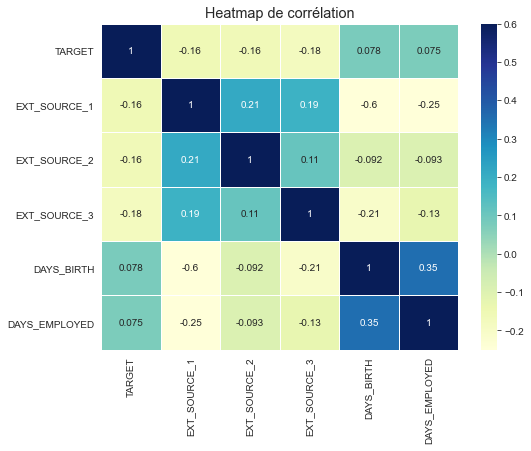

In [201]:
plt.figure(figsize=(8, 6))
sns.heatmap(ext_data_corrs, cmap="YlGnBu",
            vmin=-0.25, annot=True, vmax=0.6, linewidths=.5)
plt.title('Heatmap de corrélation')
plt.show()

Dataset has 0 variance; skipping density estimate.
Dataset has 0 variance; skipping density estimate.


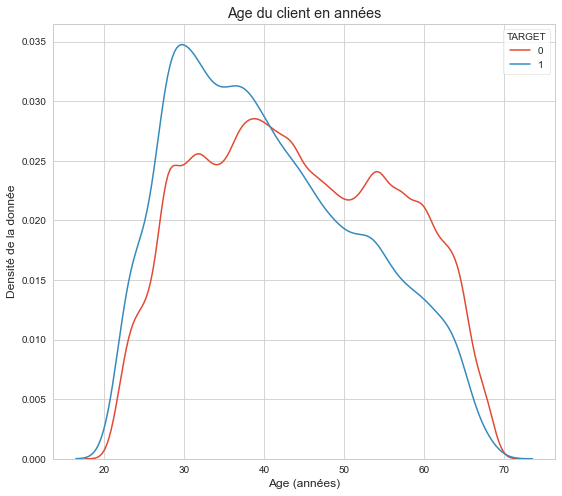

In [202]:
age_data = df[['TARGET', 'DAYS_BIRTH']]
age_data = age_data.assign(YEARS_BIRTH=df['DAYS_BIRTH']/-365)

plt.figure(figsize=(9, 8))
sns.kdeplot(df.loc[df['TARGET'] == 0, 'DAYS_BIRTH']/-365,hue = df['TARGET'],
            label='target à 0')
sns.kdeplot(df.loc[df['TARGET'] == 1, 'DAYS_BIRTH']/-365,hue = df['TARGET'],
            label='target à 1')
plt.title("Age du client en années")
plt.ylabel("Densité de la donnée")
plt.xlabel("Age (années)")
plt.show()

* Affichage de l'influence de la date d'embauche sur le TARGET

Dataset has 0 variance; skipping density estimate.
Dataset has 0 variance; skipping density estimate.


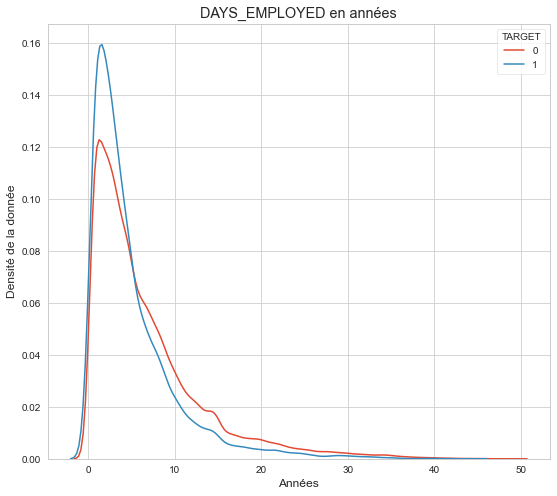

In [203]:
plt.figure(figsize=(9, 8))
sns.kdeplot(df.loc[df['TARGET'] == 0, 'DAYS_EMPLOYED']/-365,
            label='target à 0', hue = df['TARGET'])
sns.kdeplot(df.loc[df['TARGET'] == 1, 'DAYS_EMPLOYED']/-365,
            label='target à 1', hue = df['TARGET'])
plt.title("DAYS_EMPLOYED en années")
plt.ylabel("Densité de la donnée")
plt.xlabel("Années")
plt.show()

Dataset has 0 variance; skipping density estimate.
Dataset has 0 variance; skipping density estimate.
Dataset has 0 variance; skipping density estimate.
Dataset has 0 variance; skipping density estimate.
Dataset has 0 variance; skipping density estimate.
Dataset has 0 variance; skipping density estimate.


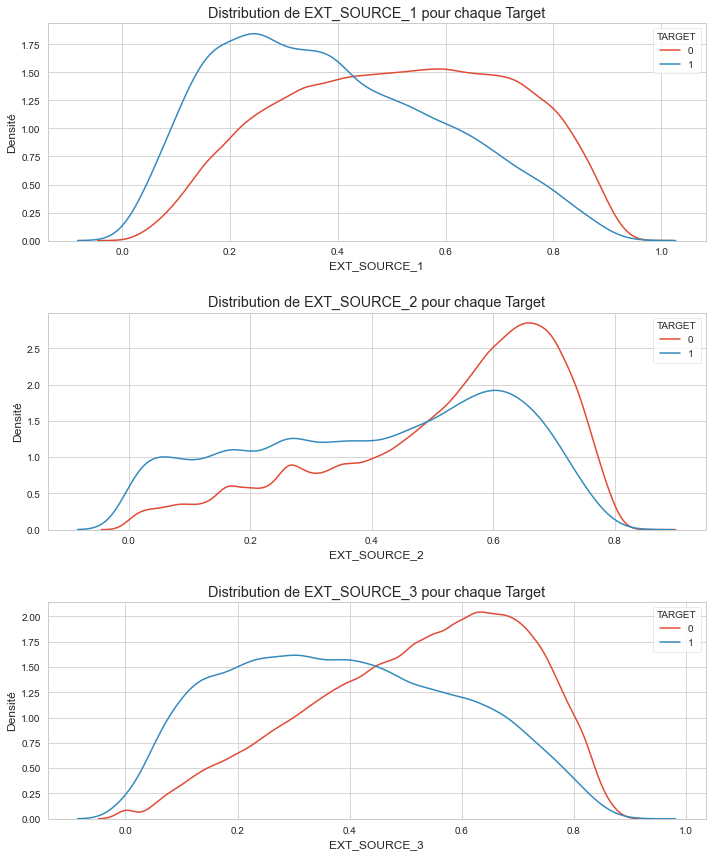

In [204]:
plt.figure(figsize=(10, 12))

for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):

    plt.subplot(3, 1, i + 1)
    sns.kdeplot(df.loc[df['TARGET'] == 0, source],
                label='target à 0', hue = df['TARGET'])
    sns.kdeplot(df.loc[df['TARGET'] == 1, source],
                label='target à 1', hue = df['TARGET'])
    plt.title('Distribution de %s pour chaque Target' % source)
    plt.xlabel(f'{source}')
    plt.ylabel('Densité')

plt.tight_layout(h_pad=2.5)

<a id='feature'></a>
#  II.2) IV) Feature engineering

In [205]:
df_imputed.to_pickle('data/app_data_train')



data_train = pd.read_pickle('data/app_data_train')
print('Training data shape: ', data_train.shape)

Training data shape:  (307511, 244)




 On transforme les données brutes en la forme la plus appropriée pour un algorithme de machine learning spécifique

## a) Variables polynômiales¶
HYPERpara
> Pour augmenter l'influence et la corrélation des variables **EXT_SOURCE et DAYS_BIRTH** avec **TARGET**,
  on va former de nouvelles variables qui sont des polynômes des variables initiales.
  Dans notre cas, on va utiliser le degré d=3 afin d'obtenir de nouvelles variables qui sont le produit de    l'interaction entre ces premières variables (**ex : EXT_SOURCE_1 x EXT_SOURCE_2^2**).
> La classe **PolynomialFeatures** de **sklearn** permet de générer de telles variables polynômiales.

In [206]:


poly_features = data_train[['EXT_SOURCE_1', 'EXT_SOURCE_2',
                            'EXT_SOURCE_3',
                            'DAYS_BIRTH', 'TARGET']]

imputer = SimpleImputer(strategy='median')

poly_target = poly_features['TARGET']

poly_features = poly_features.drop(columns=['TARGET'])

poly_features = imputer.fit_transform(poly_features)

poly_transformer = PolynomialFeatures(degree=3)
poly_transformer.fit(poly_features)

poly_features = poly_transformer.transform(poly_features)
print('Forme des variables polynômiales du fichier train : ',
      poly_features.shape)

Forme des variables polynômiales du fichier train :  (307511, 35)


> <font color='green'> On est passé de 4 variables à 35 variables polynômiales de degré inférieures ou égales à 3.</font>

In [207]:
poly_transformer.get_feature_names(input_features=['EXT_SOURCE_1',
                                                   'EXT_SOURCE_2',
                                                   'EXT_SOURCE_3',
                                                   'DAYS_BIRTH'])[:35]

['1',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_BIRTH',
 'EXT_SOURCE_1^2',
 'EXT_SOURCE_1 EXT_SOURCE_2',
 'EXT_SOURCE_1 EXT_SOURCE_3',
 'EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_2^2',
 'EXT_SOURCE_2 EXT_SOURCE_3',
 'EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_3^2',
 'EXT_SOURCE_3 DAYS_BIRTH',
 'DAYS_BIRTH^2',
 'EXT_SOURCE_1^3',
 'EXT_SOURCE_1^2 EXT_SOURCE_2',
 'EXT_SOURCE_1^2 EXT_SOURCE_3',
 'EXT_SOURCE_1^2 DAYS_BIRTH',
 'EXT_SOURCE_1 EXT_SOURCE_2^2',
 'EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3',
 'EXT_SOURCE_1 EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_1 EXT_SOURCE_3^2',
 'EXT_SOURCE_1 EXT_SOURCE_3 DAYS_BIRTH',
 'EXT_SOURCE_1 DAYS_BIRTH^2',
 'EXT_SOURCE_2^3',
 'EXT_SOURCE_2^2 EXT_SOURCE_3',
 'EXT_SOURCE_2^2 DAYS_BIRTH',
 'EXT_SOURCE_2 EXT_SOURCE_3^2',
 'EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH',
 'EXT_SOURCE_2 DAYS_BIRTH^2',
 'EXT_SOURCE_3^3',
 'EXT_SOURCE_3^2 DAYS_BIRTH',
 'EXT_SOURCE_3 DAYS_BIRTH^2',
 'DAYS_BIRTH^3']

* Examinons désormais les corrélations entre ces nouvelles variables et **TARGET** :

In [208]:
column_1 = poly_transformer.get_feature_names(['EXT_SOURCE_1',
                                               'EXT_SOURCE_2',
                                               'EXT_SOURCE_3',
                                               'DAYS_BIRTH'])
poly_features = pd.DataFrame(poly_features,
                             columns=column_1)

poly_features['TARGET'] = poly_target

poly_corrs = poly_features.corr()['TARGET'].sort_values()

print(poly_corrs.head(10))
print(poly_corrs.tail(5))

EXT_SOURCE_2 EXT_SOURCE_3                -0.193939
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.189605
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176428
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.172282
EXT_SOURCE_1 EXT_SOURCE_2                -0.166625
EXT_SOURCE_1 EXT_SOURCE_3                -0.164065
EXT_SOURCE_2                             -0.160295
EXT_SOURCE_1 EXT_SOURCE_2^2              -0.156867
EXT_SOURCE_3                             -0.155892
EXT_SOURCE_1 EXT_SOURCE_3^2              -0.150822
Name: TARGET, dtype: float64
EXT_SOURCE_1 EXT_SOURCE_2 DAYS_BIRTH    0.155891
EXT_SOURCE_2 DAYS_BIRTH                 0.156873
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH    0.181283
TARGET                                  1.000000
1                                            NaN
Name: TARGET, dtype: float64


> <font color='green'> Les coefficients de corrélation linéaire des variables polynômiales sont plus élevées que les variables originales.</font>

In [209]:
poly_features['SK_ID_CURR'] = data_train['SK_ID_CURR']
df_poly = data_train.merge(poly_features,
                                   on='SK_ID_CURR',
                                   how='left')

print('Forme du fichier train avec les var. polynômiales : ',
      df_poly.shape)

Forme du fichier train avec les var. polynômiales :  (307511, 280)


##  Variables fonctionnelles

> On va définir des variables fonctionnelles que l'on considère avoir une incidence et une influence sur la capacité d'un client à rembourser son crédit :
<font color='red'>
* CREDIT_INCOME_PERCENT: le pourcentage du montant total du crédit sur les revenus du client
* ANNUITY_INCOME_PERCENT: le pourcentage des rentes annuelles du crédit sur les revenus du client
* CREDIT_TERM: durée des paiements en mois
* DAYS_EMPLOYED_PERCENT: proportion de la période d'activité professionnelle du client par rapport à son âge
</font>

In [210]:
data_fonc = data_train.copy()

data_fonc['CREDIT_INCOME_PERCENT'] = data_fonc['AMT_CREDIT']  / data_fonc['AMT_INCOME_TOTAL']
data_fonc['ANNUITY_INCOME_PERCENT'] = data_fonc['AMT_ANNUITY'] /data_fonc['AMT_INCOME_TOTAL']
data_fonc['CREDIT_TERM'] = data_fonc['AMT_ANNUITY'] / data_fonc['AMT_CREDIT']
data_fonc['DAYS_EMPLOYED_PERCENT'] = (data_fonc['DAYS_EMPLOYED']) / (data_fonc['DAYS_BIRTH'])

* Affichage des distributions de ces variables fonctionnelles :

Dataset has 0 variance; skipping density estimate.
Dataset has 0 variance; skipping density estimate.
Dataset has 0 variance; skipping density estimate.
Dataset has 0 variance; skipping density estimate.
Dataset has 0 variance; skipping density estimate.
Dataset has 0 variance; skipping density estimate.
Dataset has 0 variance; skipping density estimate.
Dataset has 0 variance; skipping density estimate.


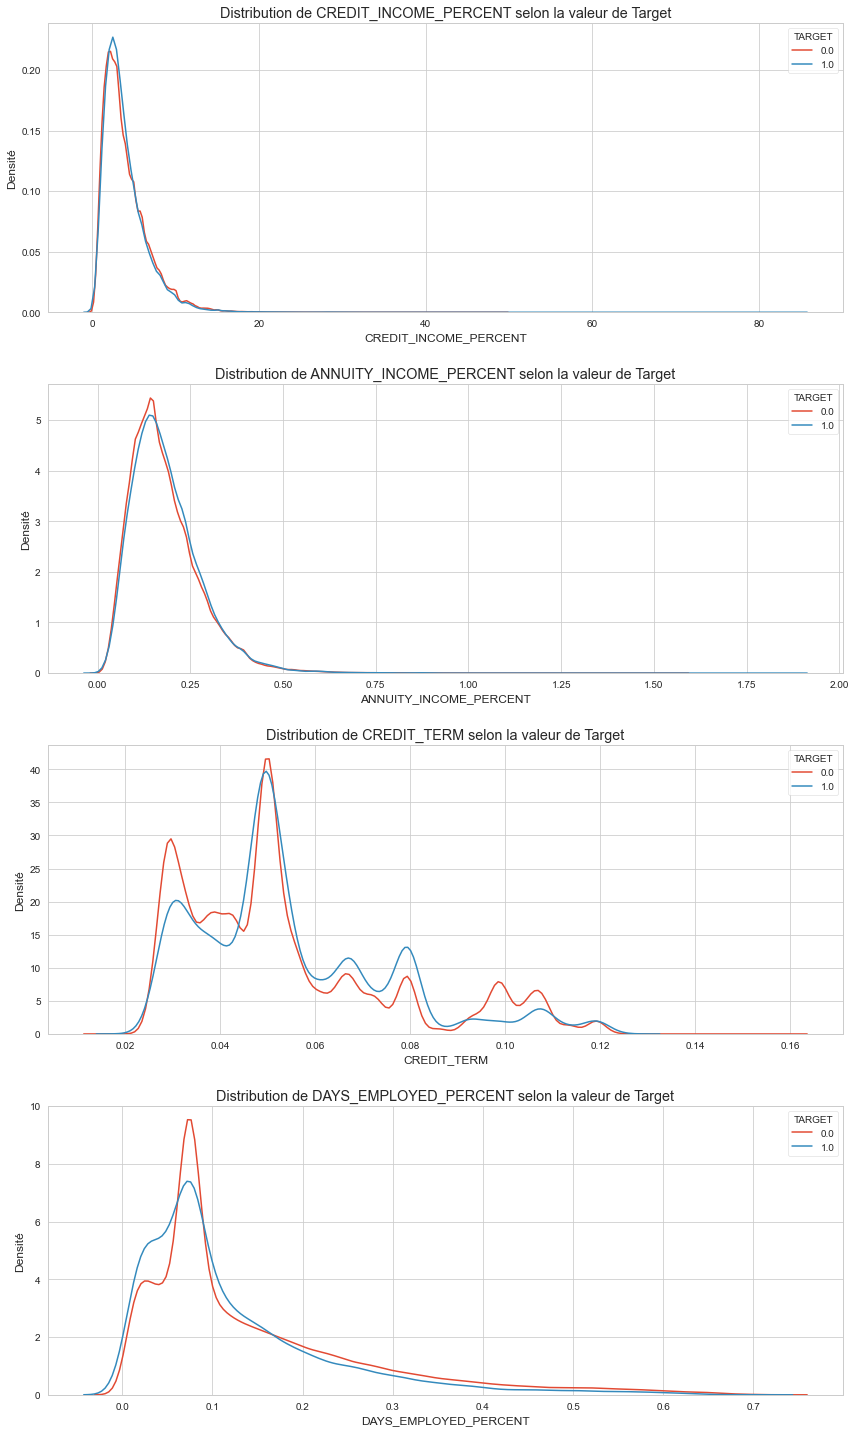

In [211]:
plt.figure(figsize=(12, 20))
for i, feature in enumerate(['CREDIT_INCOME_PERCENT',
                             'ANNUITY_INCOME_PERCENT',
                             'CREDIT_TERM',
                             'DAYS_EMPLOYED_PERCENT']):

    plt.subplot(4, 1, i + 1)
    sns.kdeplot(data_fonc.loc[data_fonc['TARGET'] == 0,
                              feature],
                label='target == 0',hue = data_train['TARGET'])
    sns.kdeplot(data_fonc.loc[data_fonc['TARGET'] == 1,
                              feature],
                label='target == 1',hue = data_train['TARGET'])

    plt.title(f'Distribution de {feature} selon la valeur de Target')
    plt.xlabel(f'{feature}')
    plt.ylabel('Densité')


plt.tight_layout(h_pad=2.5)

<a id='score'></a>
# Modèles de scoring des clients

In [212]:
data_fonc.columns
data_train.columns
data_train = data_fonc

In [213]:
data_train[data_train["TARGET"] == 1].shape[0]

24825

In [214]:
data_train[data_train["TARGET"] == 0].shape[0]

282686


<font color = "cyan"><i> Le nombre de lignes de **TARGET == 0** est plus important que **TARGET == 1** ce qui peut induire un sur apprentissage du modèle car la probabilité de prédire 0 sera plus grande. </i></font>

<font color = "cyan"><i>Pour y remédier je vais utilisier le meme nombre de ligne pour **TARGET == 1** et **TARGET == 0**  </i></font>

In [215]:
df_1 = data_train[data_train["TARGET"] == 1]
df_0 = data_train[data_train["TARGET"] == 0].sample(24825)
data_train = df_0.merge(df_1, how='outer')

In [216]:
print('Nombre de lignes du fichier df   : ', data_train[data_train["TARGET"] == 1].shape[0])
print('Nombre de lignes du fichier df : ', data_train[data_train["TARGET"] == 0].shape[0])

Nombre de lignes du fichier df   :  24825
Nombre de lignes du fichier df :  24825


Baseline avec la régression logistique

In [217]:
def show_score(y_test,y_pred_d_cls_prob,y_pred_d_cls):
    '''Compute and shows different scores'''
    a = roc_auc_score(y_test,y_pred_d_cls_prob)
    b = f1_score(y_test,y_pred_d_cls)
    c = accuracy_score(y_test,y_pred_d_cls)
    d = precision_score(y_test,y_pred_d_cls)
    e = recall_score(y_test,y_pred_d_cls)
    f = fbeta_score(y_test, y_pred_d_cls, beta=50)

    print('ROC AUC   :',a)
    print('F1        :',b)
    print('Accuracy  :',c)
    print('Precision :',d)
    print('Recall    :',e)
    print('F50   :',f)

In [218]:
def show_roc(roc_auc,false_positive_rate,true_positive_rate):

    plt.figure(figsize=(10, 10))
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, color='red',
             label='AUC = %0.4f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.axis('tight')
    plt.ylabel('Taux de vrai positif')
    plt.xlabel('Taux de faux positif')
    plt.show()

    return

In [219]:
def show_matrice(y_test,y_pred):
    cm = confusion_matrix(y_test, y_pred)

    x_axis_labels = ["client solvable", "client non solvable"]
    y_axis_labels = ["client solvable", "client non solvable"]
    f, ax = plt.subplots(figsize =(7,7))
    sns.heatmap(cm, annot=True, linewidths=0.2, linecolor="black",
                fmt=".0f", ax=ax, cmap="Blues",
                xticklabels=x_axis_labels,
                yticklabels=y_axis_labels)
    plt.xlabel("CLASSE REELLE")
    plt.ylabel("CLASSE PREDITE")
    plt.title('Matrice de Confusion pour la Régression Logistique')
    plt.show()
    return

In [220]:
def show_importance(positive,data_train,importance,modele):
    indices = np.argsort(importance)[::-1]

    print(type(indices))
    if len(indices)>247:
        size = len(indices) - 247
        indices = indices[:-size]
    if positive == True :

        print("Importance positive des 10 premières variables :")
        col_pos = []
        for f in range(10):
            print(f'\n{f+1}. variable {data_train.columns[indices[f]]} :{importance[indices[f]]}')
        col_pos.append(indices[f])

        fig, ax = plt.subplots()
        plt.figure(figsize=(10, 10))

        ax.barh(range(10), importance[indices[:10]], align='center', color="b")
        ax.set_yticks(range(10))
        ax.set_yticklabels(data_train.columns[indices[:10]])
        ax.invert_yaxis()
        ax.set_xlabel('Importance')
        ax.set_title(f"Importance positive des variables ({modele})", fontsize=16)
        plt.show()
    else:
        print("Importance négatives des 10 premières variables :")
        if len(indices)>247:
            size = len(indices) - 247
            indices = indices[:-size]
        for f in range(10):

            print(f'\n{f+1}. variable {data_train.columns[indices[237 + f]]} :{importance[indices[233+f]]}')

        fig, ax = plt.subplots()
        plt.figure(figsize=(10, 10))
        ax.barh(range(10), importance[indices[237:]], align='center', color="r")
        ax.set_yticks(range(10))
        ax.set_yticklabels(data_train.columns[indices[237:]])
        ax.invert_yaxis()
        ax.set_xlabel('Importance')
        ax.set_title(f"Importance négative des variables ({modele})", fontsize=16)
        plt.show()


## Test and Train split


In [221]:
#data_train = pd.read_pickle('data/app_data_train')
X = data_train.drop( columns = ['TARGET'])
y = data_train['TARGET']
features = X.columns

* Normalisation des variables train pour améliorer les résultats du modèle  :



In [222]:
'''print("x",X.shape,"y ",y.shape)
counter = Counter(y)
print(counter)



oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
#X = X.sample(24825)
#y = y.sample(24825)

print("x",X.shape,"y ",y.shape)


counter = Counter(y)
print(counter)
'''

'print("x",X.shape,"y ",y.shape)\ncounter = Counter(y)\nprint(counter)\n\n\n\noversample = SMOTE()\nX, y = oversample.fit_resample(X, y)\n#X = X.sample(24825)\n#y = y.sample(24825)\n\nprint("x",X.shape,"y ",y.shape)\n\n\ncounter = Counter(y)\nprint(counter)\n'

In [223]:
counter = Counter(y)
print(counter)
print("x",X.shape,"y ",y.shape)

Counter({0.0: 24825, 1.0: 24825})
x (49650, 247) y  (49650,)


In [224]:
i = 0

In [225]:
test_ids = data_train.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=2)

In [226]:
scale = preprocessing.MinMaxScaler(feature_range=(0, 1)).fit(X_train)
X_train_scale = scale.transform(X_train)
X_test_scale = scale.transform(X_test)


* Calcul de la probabillité que le client obtienne 1 avec la **Régression logistique** :

In [227]:
tab_f1    = []
tab_fbeta = []
tab_auroc = []

# Inverse du paramètre de régularisation -- > paramètre C
lr = LogisticRegression(max_iter=800)

lr.fit(X_train_scale, y_train)

y_prob_lr = lr.predict_proba(X_test_scale)[:, 1]
y_pred = lr.predict(X_test_scale)


false_positive_rate, true_positive_rate, thresholds =  \
                            roc_curve(y_test, y_prob_lr)
roc_auc = auc(false_positive_rate, true_positive_rate)
f1 = f1_score(y_test, y_pred)
fbeta = fbeta_score(y_test, y_pred, beta=50)
tab_f1.append(f1)
tab_fbeta.append(fbeta)
tab_auroc.append(roc_auc)

In [228]:
show_score(y_test,y_prob_lr,y_pred)

ROC AUC   : 0.7442714263271619
F1        : 0.6762846092455032
Accuracy  : 0.6781812633506256
Precision : 0.6802519451648759
Recall    : 0.67236328125
F50   : 0.6723663988900482


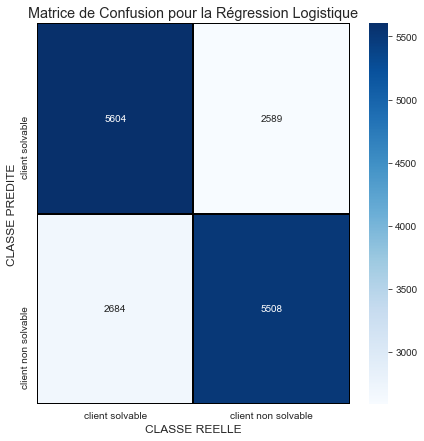

In [229]:
show_matrice(y_test,y_pred)

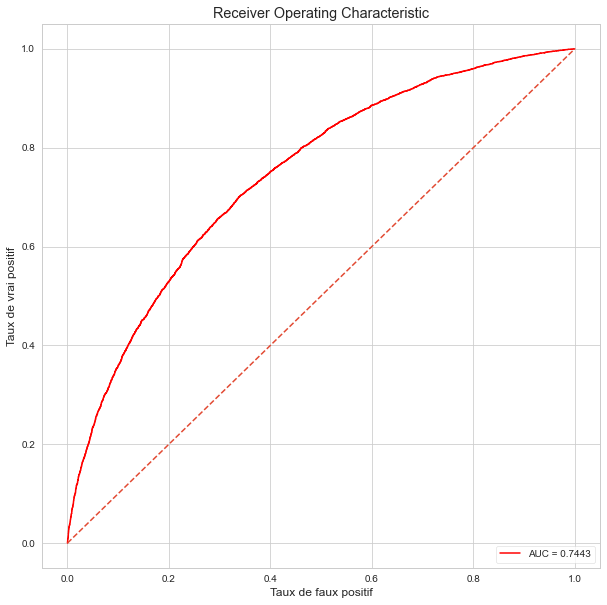

In [230]:
show_roc(roc_auc,false_positive_rate,true_positive_rate)

In [231]:
importance = lr.coef_[0]

<class 'numpy.ndarray'>
Importance positive des 10 premières variables :

1. variable AMT_CREDIT :3.0442342931780115

2. variable OBS_60_CNT_SOCIAL_CIRCLE :2.2806440460849995

3. variable CREDIT_INCOME_PERCENT :1.7980587281891847

4. variable AMT_INCOME_TOTAL :1.7302082975907593

5. variable OBS_30_CNT_SOCIAL_CIRCLE :1.4990220199246427

6. variable DAYS_LAST_PHONE_CHANGE :1.424089739111498

7. variable DAYS_BIRTH :1.1787233215686659

8. variable LIVINGAREA_MODE :0.8924279211612506

9. variable AMT_REQ_CREDIT_BUREAU_HOUR :0.885050622166347

10. variable ORGANIZATION_TYPE_Postal :0.7909695859367194


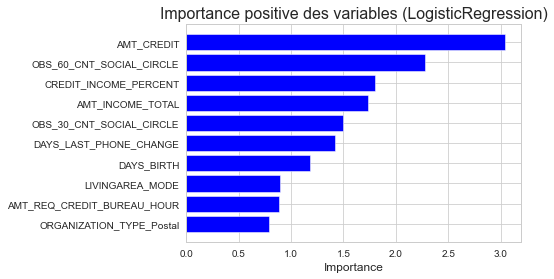

<Figure size 720x720 with 0 Axes>

In [232]:
show_importance(True,data_train,importance,'LogisticRegression')

<class 'numpy.ndarray'>
Importance négatives des 10 premières variables :

1. variable FLAG_DOCUMENT_13 :-0.7129631259792555

2. variable NAME_INCOME_TYPE_Working :-0.7731162035798386

3. variable AMT_REQ_CREDIT_BUREAU_DAY :-0.779564082857069

4. variable ANNUITY_INCOME_PERCENT :-0.8185934148428344

5. variable FLAG_DOCUMENT_12 :-0.8245852409420593

6. variable AMT_REQ_CREDIT_BUREAU_WEEK :-0.8722553140886563

7. variable LIVE_CITY_NOT_WORK_CITY :-0.8923014124833275

8. variable EXT_SOURCE_1 :-0.9226275108271277

9. variable EXT_SOURCE_2 :-1.15109131863657

10. variable AMT_ANNUITY :-1.2730614968705578


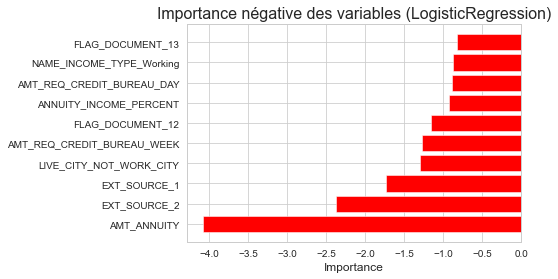

<Figure size 720x720 with 0 Axes>

In [233]:
show_importance(False,data_train,importance,'LogisticRegression')

Amélioration de la régression logistique par la recherche des hyperparamètres

In [234]:
lr = LogisticRegression(solver='sag', max_iter=100)
params = {'C': np.logspace(-3, 3, 7), 'penalty':['l2']}

model_lr_gs = GridSearchCV(lr, params, cv=3, n_jobs=-1,
                     scoring='roc_auc')

model_lr_gs.fit(X_train_scale, y_train)
best_model_lr_gs = model_lr_gs.best_estimator_

The max_iter was reached which means the coef_ did not converge


In [235]:
y_prob_lr_gd = best_model_lr_gs.predict_proba(X_test_scale)[:, 1]
y_pred_lr_gd = best_model_lr_gs.predict(X_test_scale)

false_positive_rate, true_positive_rate, thresholds =\
    roc_curve(y_test, y_prob_lr_gd)
roc_auc = auc(false_positive_rate, true_positive_rate)

In [236]:
importance = best_model_lr_gs.coef_[0]

In [237]:
show_score(y_test,y_prob_lr_gd,y_pred_lr_gd)

ROC AUC   : 0.7445942652788585
F1        : 0.6787596519181273
Accuracy  : 0.6800732377174245
Precision : 0.6815161210927886
Recall    : 0.676025390625
F50   : 0.676027568358375


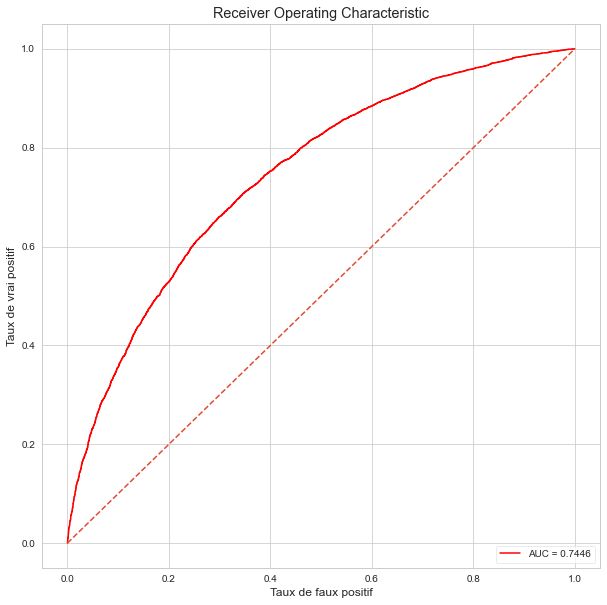

In [238]:
show_roc(roc_auc,false_positive_rate,true_positive_rate)

<class 'numpy.ndarray'>
Importance positive des 10 premières variables :

1. variable AMT_INCOME_TOTAL :4.120706188846253

2. variable OBS_60_CNT_SOCIAL_CIRCLE :3.464123721868039

3. variable DAYS_LAST_PHONE_CHANGE :3.4459921324823934

4. variable AMT_CREDIT :3.151830918631723

5. variable CREDIT_INCOME_PERCENT :2.5970787622252276

6. variable LIVINGAREA_MODE :2.41871712399733

7. variable APARTMENTS_MODE :1.809250752035989

8. variable NONLIVINGAPARTMENTS_AVG :1.7153651273957482

9. variable NAME_INCOME_TYPE_Student :1.6750356427802198

10. variable ORGANIZATION_TYPE_Industry: type 7 :1.6179778683323964


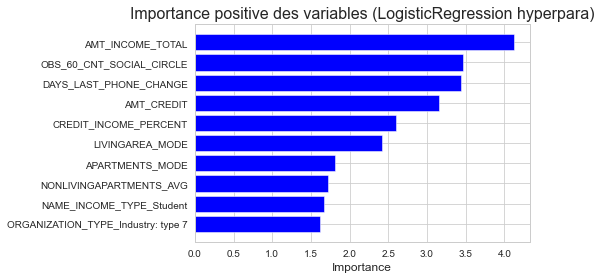

<Figure size 720x720 with 0 Axes>

In [239]:
show_importance(True,data_train,importance,'LogisticRegression hyperpara')


<class 'numpy.ndarray'>
Importance négatives des 10 premières variables :

1. variable FLAG_DOCUMENT_16 :-1.1221719799991052

2. variable AMT_REQ_CREDIT_BUREAU_WEEK :-1.2036066757468205

3. variable EXT_SOURCE_1 :-1.2463984596827897

4. variable NAME_INCOME_TYPE_Maternity leave :-1.3025619058910283

5. variable NONLIVINGAPARTMENTS_MODE :-1.332742721646495

6. variable FLAG_DOCUMENT_3 :-1.4208711364250675

7. variable APARTMENTS_AVG :-1.741062232439079

8. variable EXT_SOURCE_2 :-1.7533778497976165

9. variable DAYS_EMPLOYED_ANOM :-1.7818748350328077

10. variable AMT_ANNUITY :-1.8663771180579303


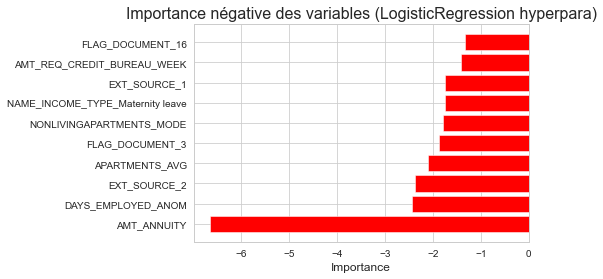

<Figure size 720x720 with 0 Axes>

In [240]:
show_importance(False,data_train,importance,'LogisticRegression hyperpara')




ADB
Classifier:  AdaBoostClassifier(random_state=1)
best params: {'learning_rate': 0.5, 'n_estimators': 100}
best scores: -0.6887788684182126
Accuracy: 68.5871%
F-mesure               : 0.6837
F50-mesure             : 0.6792
Aire sous la courbe ROC: 0.7480
<class 'numpy.ndarray'>
Importance positive des 10 premières variables :

1. variable ANNUITY_INCOME_PERCENT :0.18

2. variable EXT_SOURCE_1 :0.11

3. variable EXT_SOURCE_2 :0.07

4. variable AMT_CREDIT :0.06

5. variable AMT_ANNUITY :0.06

6. variable LIVE_CITY_NOT_WORK_CITY :0.04

7. variable DAYS_BIRTH :0.04

8. variable DAYS_REGISTRATION :0.03

9. variable REGION_POPULATION_RELATIVE :0.03

10. variable DAYS_EMPLOYED_ANOM :0.02
Classifieur report: 

               precision    recall  f1-score   support

         0.0       0.68      0.69      0.69      8193
         1.0       0.69      0.68      0.68      8192

    accuracy                           0.69     16385
   macro avg       0.69      0.69      0.69     16385
weighted avg 

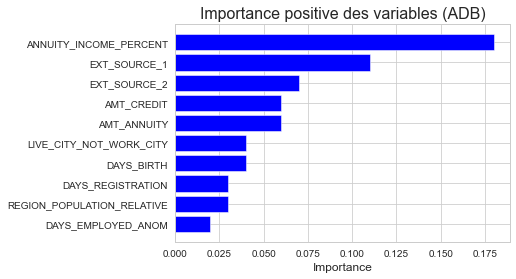

<Figure size 720x720 with 0 Axes>

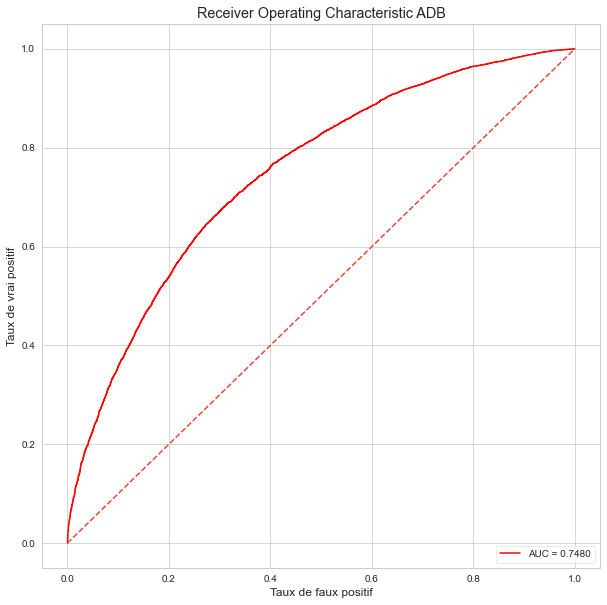

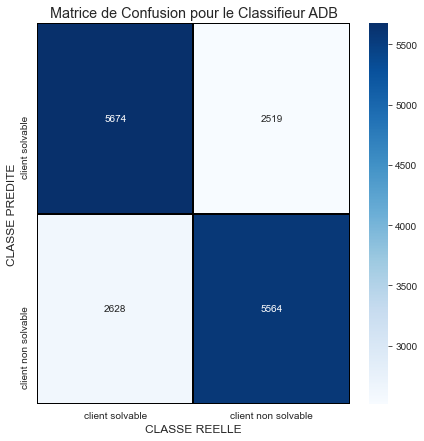

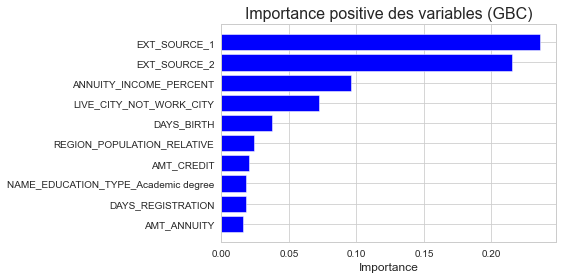

<Figure size 720x720 with 0 Axes>

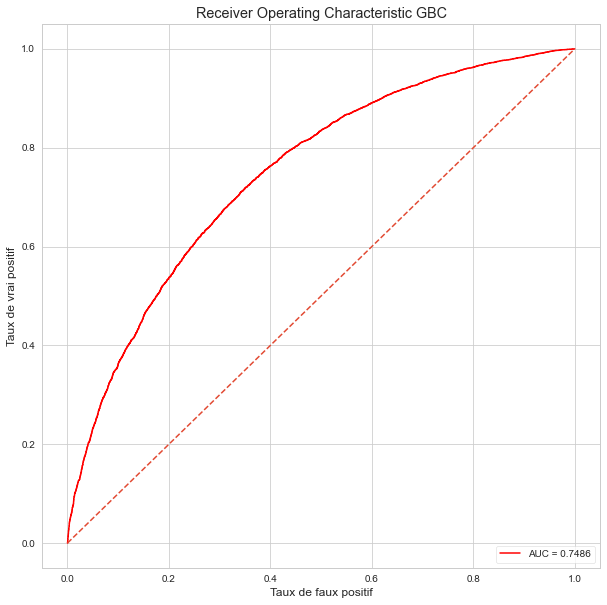

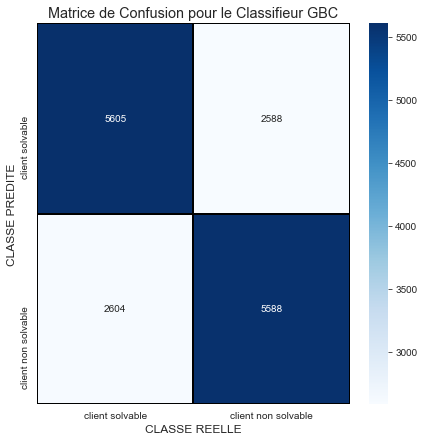

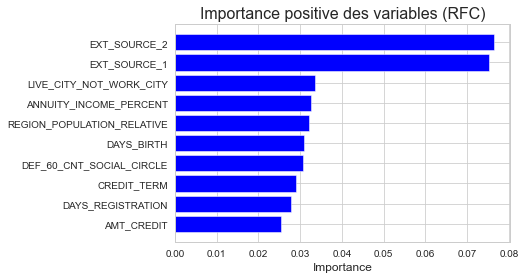

<Figure size 720x720 with 0 Axes>

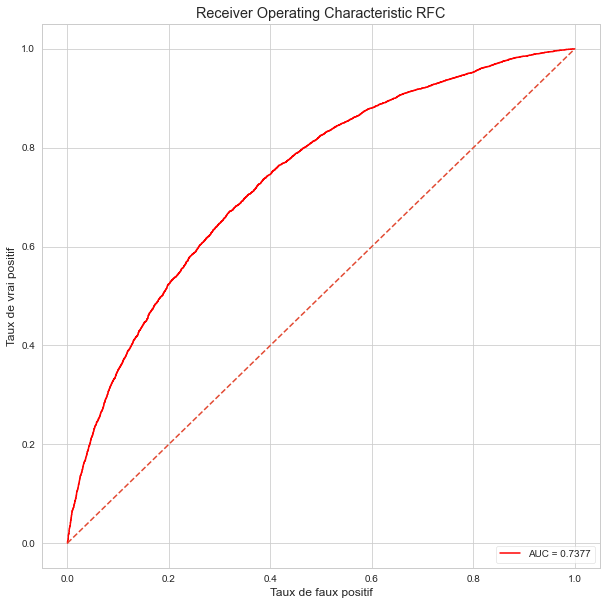

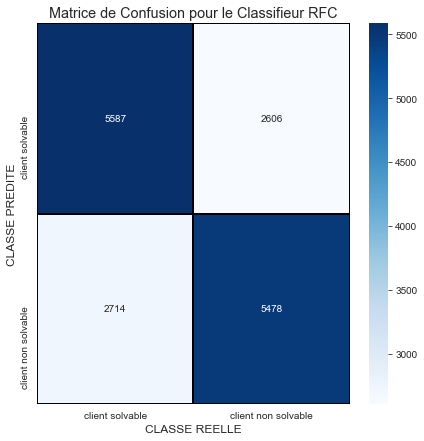

In [241]:
seed = 1
models = [
            'ADB',
            'GBC',
            'RFC'
         ]
clfs = [
        AdaBoostClassifier(random_state=seed),
        GradientBoostingClassifier(random_state=seed),
        RandomForestClassifier(random_state=seed, n_jobs=-1)
        ]

params = {
            models[0]:{'learning_rate':[0.5],
                       'n_estimators':[100,150]},
            models[1]:{'learning_rate':[0.5],
                       'n_estimators':[100,150],
                       'max_depth':[3],
                       'min_samples_split':[2],
                       'min_samples_leaf': [2]},
            models[2]:{
                       'criterion':['gini'],
                       'min_samples_split':[2],
                       'min_samples_leaf': [4]}

         }


test_scores = []
coefs       = []
estimation  = []

for name, estimator in zip(models,clfs):
    print(name)
    print("Classifier: ",estimator)
    clf = GridSearchCV(estimator, params[name],
                       scoring='neg_log_loss',
                       refit='True',
                       n_jobs=-1,
                       cv=4)

    clf.fit(X_train_scale, y_train)
    best_model_clf = clf.best_estimator_

    print("best params: " + str(clf.best_params_))
    print("best scores: " + str(clf.best_score_))

    estimates = clf.predict_proba(X_test_scale)[:, 1]
    acc = accuracy_score(y_test,
                         clf.predict(X_test_scale))

    y_pred = clf.predict(X_test_scale)
    print("Accuracy: {:.4%}".format(acc))

    test_scores.append((acc,clf.best_score_))
    estimation.append([name, estimates])
    coefs.append([name, clf.best_estimator_.feature_importances_])

    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,
                                                                    estimates)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    f1 = f1_score(y_test, clf.predict(X_test_scale))
    fbeta = fbeta_score(y_test, clf.predict(X_test_scale), beta=50)
    tab_f1.append(f1)
    tab_fbeta.append(fbeta)
    tab_auroc.append(roc_auc)

    print("F-mesure               : {:.4f}".format(f1))
    print("F50-mesure             : {:.4f}".format(fbeta))
    print("Aire sous la courbe ROC: {:.4f}".format(roc_auc))

    importance = best_model_clf.feature_importances_

    show_importance(True,data_train,importance,name)

    plt.figure(figsize=(10, 10))
    plt.title(f'Receiver Operating Characteristic {name}')
    plt.plot(false_positive_rate,true_positive_rate, color='red',
             label='AUC = %0.4f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.axis('tight')
    plt.ylabel('Taux de vrai positif')
    plt.xlabel('Taux de faux positif')
    plt.show()

    print("Classifieur report: \n\n", classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    x_axis_labels = ["client solvable", "client non solvable"]
    y_axis_labels = ["client solvable", "client non solvable"]
    f, ax = plt.subplots(figsize =(7,7))
    sns.heatmap(cm, annot=True, linewidths=0.2, linecolor="black",
                fmt=".0f", ax=ax, cmap="Blues",
                xticklabels=x_axis_labels,
                yticklabels=y_axis_labels)
    plt.xlabel("CLASSE REELLE")
    plt.ylabel("CLASSE PREDITE")
    plt.title(f'Matrice de Confusion pour le Classifieur {name}')
    plt.show()



# Custom metric


In [242]:
#acc = (TP+ TN) / (TP+TN+FP+FN)
#a= (1.5*TP+ TN) / (1.5*TP+TN+FP+FN)
def custom_metric(y,y_pred):
    return np.sum((y_pred < y + y*0.2) & (y_pred > y - y*0.2))/y.size


In [243]:
custom_metric(y_test,y_pred)

0.334330180042722

In [244]:
X.shape

(49650, 247)

In [245]:
y.shape

(49650,)

In [246]:
custom_score = make_scorer(custom_metric,greater_is_better=True)

In [247]:
cross_val_score(RandomForestClassifier(),X_train,y_train, cv=3, scoring = custom_score)

array([0.3226621 , 0.32720058, 0.32638889])

In [248]:
print("rdf")
params = {'learning_rate':[0.5],
                       'n_estimators':[100,150],
                       'max_depth':[3],
                       'min_samples_split':[2],
                       'min_samples_leaf': [2]}
# Import the model we are using


model_rf = RandomForestClassifier(n_jobs=-1, random_state=1)

rdf


In [249]:
# gridsearch custom score
model_rf_gs = GridSearchCV(model_rf , params, cv = 3, scoring=custom_score)
# Train the model on training data
#model_rf_gs.fit(X_train_scale, y_train);

In [250]:
lr = LogisticRegression(solver='sag', max_iter=100)
params = {'C': np.logspace(-3, 3, 7), 'penalty':['l2']}

model_lr_gs = GridSearchCV(lr, params, cv=3, n_jobs=-1,
                     scoring=custom_score)

model_lr_gs.fit(X_train_scale, y_train)
best_model_lr_gs = model_lr_gs.best_estimator_


The max_iter was reached which means the coef_ did not converge


In [251]:
estimates = best_model_lr_gs .predict_proba(X_test_scale)[:, 1]
acc = accuracy_score(y_test, best_model_lr_gs .predict(X_test_scale))
test_scores.append((acc,model_lr_gs.best_score_))
estimation.append(["xx", estimates])


false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,
                                                                estimates)
roc_auc = auc(false_positive_rate, true_positive_rate)
f1 = f1_score(y_test, clf.predict(X_test_scale))
fbeta = fbeta_score(y_test, clf.predict(X_test_scale), beta=50)
tab_f1.append(f1)
tab_fbeta.append(fbeta)
tab_auroc.append(roc_auc)

In [252]:
print(models)
print(tab_fbeta)
print(tab_auroc)
print(tab_f1)

['ADB', 'GBC', 'RFC']
[0.6723663988900482, 0.6792028322025052, 0.682129438950544, 0.6687046968374398, 0.6687046968374398]
[0.7442714263271619, 0.7480161004082182, 0.748640107218052, 0.737690356978709, 0.7445775780153409]
[0.6762846092455032, 0.6837480798771122, 0.6827956989247311, 0.6731383632342098, 0.6731383632342098]


In [253]:
models = ['LR','ADB', 'GBC', 'RFC', 'LR_custom']
print(models)
print(tab_fbeta)
print(tab_auroc)
print(tab_f1)

['LR', 'ADB', 'GBC', 'RFC', 'LR_custom']
[0.6723663988900482, 0.6792028322025052, 0.682129438950544, 0.6687046968374398, 0.6687046968374398]
[0.7442714263271619, 0.7480161004082182, 0.748640107218052, 0.737690356978709, 0.7445775780153409]
[0.6762846092455032, 0.6837480798771122, 0.6827956989247311, 0.6731383632342098, 0.6731383632342098]


<font color = "cyan">Comparaison des f50<i> </i></font>

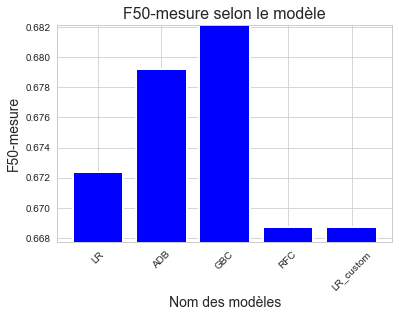

In [254]:
plt.bar(models, tab_fbeta, color='blue',
         linestyle='solid', linewidth=2,)
plt.title('F50-mesure selon le modèle', fontsize=16)
plt.ylabel('F50-mesure', fontsize=14)
plt.xlabel('Nom des modèles', fontsize=14)
plt.ylim(min(tab_fbeta)-0.001,max(tab_fbeta))
plt.xticks(rotation=45)
plt.show()

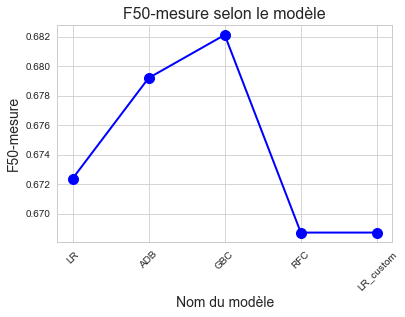

In [255]:
plt.plot(models, tab_fbeta, color='blue',
         linestyle='solid', linewidth=2,
         markerfacecolor='blue', markersize=10,
         marker='o')
plt.title('F50-mesure selon le modèle', fontsize=16)
plt.ylabel('F50-mesure', fontsize=14)
plt.xlabel('Nom du modèle', fontsize=14)
plt.xticks(rotation=45)
plt.show()

<font color = "cyan">Comparaison Aire sous la courbe ROC<i> </i></font>

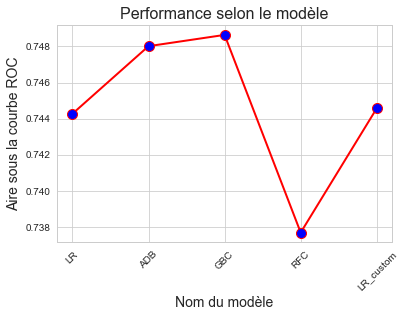

In [256]:
plt.plot(models, tab_auroc, color='red',
         linestyle='solid', linewidth=2,
         markerfacecolor='blue', markersize=10,
         marker='o')
plt.title('Performance selon le modèle', fontsize=16)
plt.ylabel('Aire sous la courbe ROC', fontsize=14)
plt.xlabel('Nom du modèle', fontsize=14)
plt.xticks(rotation=45)
plt.show()

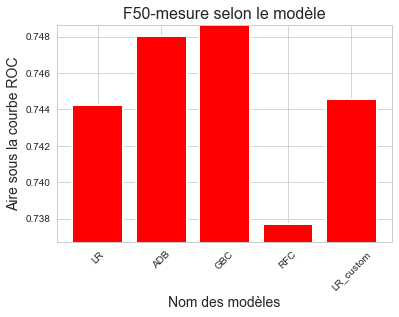

In [257]:
plt.bar(models, tab_auroc, color='red',
         linestyle='solid', linewidth=2,)
plt.title('F50-mesure selon le modèle', fontsize=16)
plt.ylabel('Aire sous la courbe ROC', fontsize=14)
plt.xlabel('Nom des modèles', fontsize=14)
plt.ylim(min(tab_auroc)-0.001,max(tab_auroc))
plt.xticks(rotation=45)
plt.show()

<font color = "cyan"> F-mesure <i> </i></font>

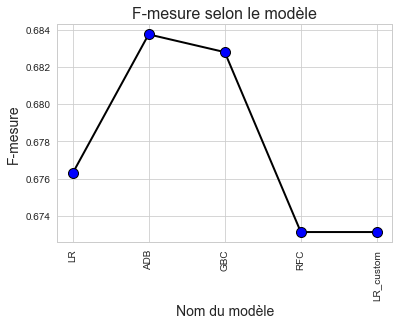

In [258]:


plt.plot(models, tab_f1, color='black',
         linestyle='solid', linewidth=2,
         markerfacecolor='blue', markersize=10,
         marker='o')
plt.title('F-mesure selon le modèle', fontsize=16)
plt.ylabel('F-mesure', fontsize=14)
plt.xlabel('Nom du modèle', fontsize=14)
plt.xticks(rotation=90)
plt.show()

<font color = "cyan">modele avec amélioration poly <i> </i></font>

In [259]:
data_train_poly = df_poly
data_train_poly.head()

,SK_ID_CURR,TARGET_x,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,EXT_SOURCE_2^2 EXT_SOURCE_3,EXT_SOURCE_2^2 DAYS_BIRTH,EXT_SOURCE_2 EXT_SOURCE_3^2,EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH,EXT_SOURCE_2 DAYS_BIRTH^2,EXT_SOURCE_3^3,EXT_SOURCE_3^2 DAYS_BIRTH,EXT_SOURCE_3 DAYS_BIRTH^2,DAYS_BIRTH^3,TARGET_y
0,100002.0,1.0,0.0,0.0,1.0,0.0,202500.0,406597.5,24700.5,351000.0,...,0.009637,-654.152107,0.005108,-346.733022,2.353667e+07,0.002707,-183.785678,1.247560e+07,-8.468590e+11,1.0
1,100003.0,0.0,0.0,0.0,0.0,0.0,270000.0,1293502.5,35698.5,1129500.0,...,0.207254,-6491.237078,0.178286,-5583.975307,1.748916e+08,0.153368,-4803.518937,1.504475e+08,-4.712058e+12,0.0
2,100004.0,0.0,1.0,1.0,1.0,0.0,67500.0,135000.0,6750.0,135000.0,...,0.225464,-5885.942404,0.295894,-7724.580288,2.016572e+08,0.388325,-10137.567875,2.646504e+08,-6.908939e+12,0.0
3,100006.0,0.0,0.0,0.0,1.0,0.0,135000.0,312682.5,29686.5,297000.0,...,0.226462,-8040.528832,0.186365,-6616.894625,2.349331e+08,0.153368,-5445.325225,1.933364e+08,-6.864416e+12,0.0
4,100007.0,0.0,0.0,0.0,1.0,0.0,121500.0,513000.0,21865.5,513000.0,...,0.055754,-2076.117157,0.092471,-3443.335521,1.282190e+08,0.153368,-5710.929881,2.126570e+08,-7.918677e+12,0.0


<font color = "cyan"><i>Imputation des valeurs manquantes </i></font>


In [260]:
train_poly_labels = data_train_poly['TARGET_x']
if 'TARGET_x' in data_train_poly:
    train_poly = data_train_poly.drop(columns=['TARGET_x'])
else:
    train_poly = data_train_poly.copy()

features = list(train_poly.columns)

imputer = SimpleImputer(strategy='median')
imputer.fit(train_poly)
train_poly = imputer.transform(train_poly)

<font color = "cyan"><i>Elimination des variables avec une variance nulle. Cela permet de sélectionner uniquement les variables utiles afin d'améliorer l'efficacité du modèle </i></font>

In [261]:
from sklearn.feature_selection import VarianceThreshold
from collections import Counter

colonnes = []


def feature_selection(train_instances):


    print('Sélection des variables ...')
    selector = VarianceThreshold()
    selector.fit(train_instances)
    print('Nombre de variables utilisées ... ' +
          str(Counter(selector.get_support())[True]))
    var = list(selector.get_support())
    for count, e in enumerate(var):
        if e == True:
           colonnes.append(data_train_poly.columns[count])

    print('Nombre de variables ignorées ... ' +
          str(Counter(selector.get_support())[False]))
    return selector

fs = feature_selection(train_poly)
train_poly = fs.transform(train_poly)

data_train_poly = pd.DataFrame(train_poly, columns=colonnes)
data_train_poly['TARGET'] = train_poly_labels

Sélection des variables ...
Nombre de variables utilisées ... 278
Nombre de variables ignorées ... 1


<font color = "cyan"><i>  Echantillonnage du jeu de données en sélectionnant le même nombre de lignes avec **TARGET 0** et **TARGET 1** </i></font>

In [262]:
data_train_1 = data_train_poly[data_train_poly["TARGET"] == 1]
data_train_0 = data_train_poly[data_train_poly["TARGET"] == 0].sample(24825)
data_train_poly = data_train_0.merge(data_train_1, how='outer')

<font color = "cyan"><i> Normalisation des variables train pour améliorer les résultats du modèle</i></font>

In [263]:

X = data_train_poly.iloc[:, 2:277]

y = data_train_poly.iloc[:, 278]
test_ids = data_train_poly.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.33)

scale = preprocessing.MinMaxScaler(feature_range=(0, 1)).fit(X_train)
X_train_scale = scale.transform(X_train)
X_test_scale = scale.transform(X_test)

<font color = "cyan"><i> Entrainement de la régression logistique avec les variables polynomiales </i></font>


In [264]:


# Inverse du paramètre de régularisation -- > paramètre C
lr = LogisticRegression(max_iter=800)

lr.fit(X_train_scale, y_train)

y_prob_lr = lr.predict_proba(X_test_scale)[:, 1]
y_pred = lr.predict(X_test_scale)


false_positive_rate, true_positive_rate, thresholds =  \
                            roc_curve(y_test, y_prob_lr)
roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
f1 = f1_score(y_test, y_pred)
fbeta = fbeta_score(y_test, y_pred, beta=50)
tab_f1.append(f1)
tab_fbeta.append(fbeta)
tab_auroc.append(roc_auc)

In [265]:
show_score(y_test,y_prob_lr,y_pred)


ROC AUC   : 0.7497550008088654
F1        : 0.6861063464837049
Accuracy  : 0.6872749465974977
Precision : 0.6800242865816636
Recall    : 0.6922981827172704
F50   : 0.6922931865797265


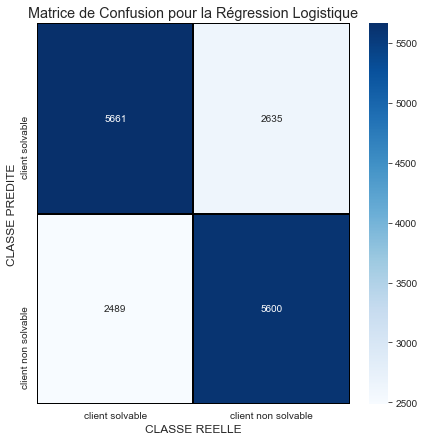

In [266]:
show_matrice(y_test, y_pred)

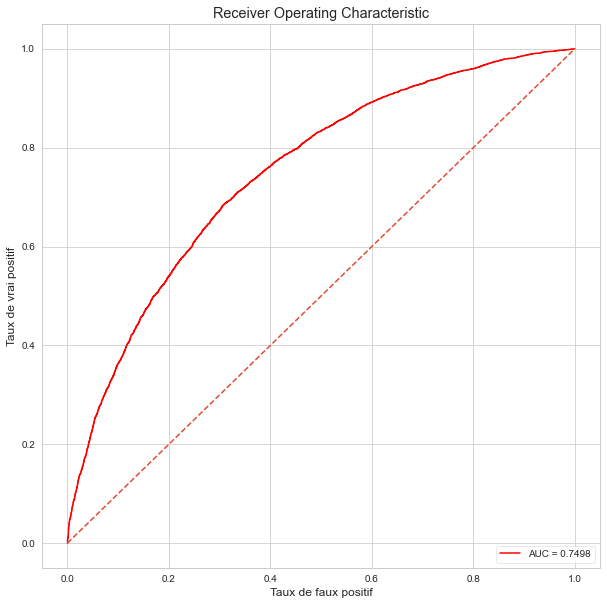

In [267]:
show_roc(roc_auc,false_positive_rate,true_positive_rate)

### optimisation la régression logistique hyperparamètres.

In [268]:
lr = LogisticRegression(solver='saga', max_iter=1000)
params = {'C': np.logspace(-3, 3, 7), 'penalty':['l2']}

lr_gs = GridSearchCV(lr, params, cv=3, n_jobs=-1,
                     scoring='roc_auc')
lr_gs.fit(X_train_scale, y_train)

print(lr_gs.best_params_)



{'C': 100.0, 'penalty': 'l2'}


The max_iter was reached which means the coef_ did not converge


In [269]:
# On récupère la prédiction de la valeur positive
y_prob = lr_gs.predict_proba(X_test_scale)[:, 1]
y_pred = lr_gs.predict(X_test_scale)


false_positive_rate, true_positive_rate, thresholds = \
                            roc_curve(y_test, y_prob)
roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
f1 = f1_score(y_test, y_pred)
fbeta_poly = fbeta_score(y_test, y_pred, beta=50)
tab_f1.append(f1)
tab_fbeta.append(fbeta)
tab_auroc.append(roc_auc)

In [270]:
show_score(y_test,y_prob_lr,y_pred)

ROC AUC   : 0.7497550008088654
F1        : 0.6879097983945094
Accuracy  : 0.6891669209642967
Precision : 0.6820170109356014
Recall    : 0.6939053034985783
F50   : 0.6939004672594613


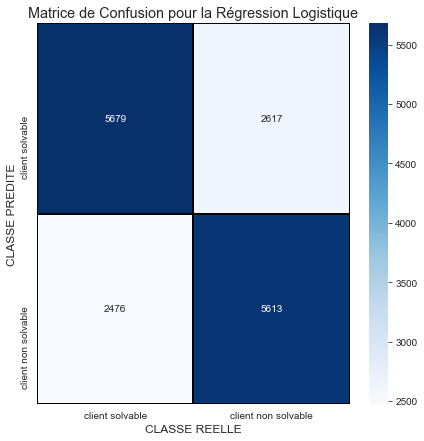

In [271]:
show_matrice(y_test, y_pred)

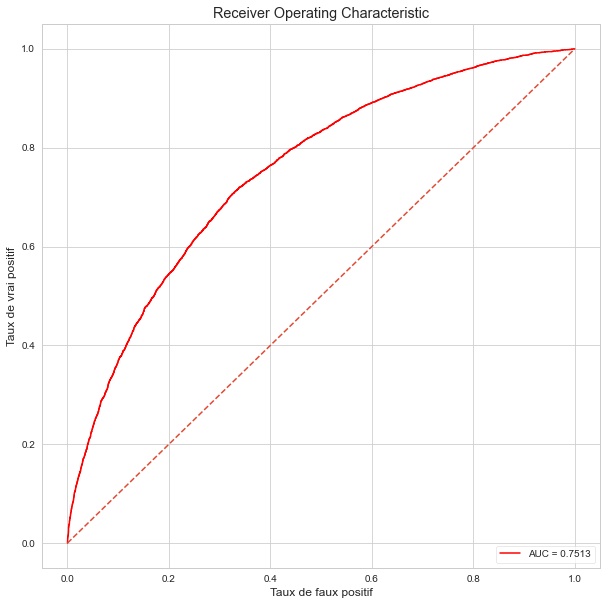

In [272]:
show_roc(roc_auc,false_positive_rate,true_positive_rate)

In [273]:
models = ['LR','ADB', 'GBC', 'RFC', 'LR_custom','lr_poly','lr_poly_opti']
print(models)
print(tab_fbeta)
print(tab_auroc)
print(tab_f1)

['LR', 'ADB', 'GBC', 'RFC', 'LR_custom', 'lr_poly', 'lr_poly_opti']
[0.6723663988900482, 0.6792028322025052, 0.682129438950544, 0.6687046968374398, 0.6687046968374398, 0.6922931865797265, 0.6922931865797265]
[0.7442714263271619, 0.7480161004082182, 0.748640107218052, 0.737690356978709, 0.7445775780153409, 0.7497550008088654, 0.7513457744024916]
[0.6762846092455032, 0.6837480798771122, 0.6827956989247311, 0.6731383632342098, 0.6731383632342098, 0.6861063464837049, 0.6879097983945094]


<font color = "cyan">Comparaison des f50<i> </i></font>

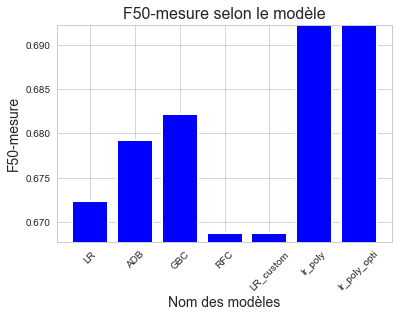

In [274]:
plt.bar(models, tab_fbeta, color='blue',
         linestyle='solid', linewidth=2,)
plt.title('F50-mesure selon le modèle', fontsize=16)
plt.ylabel('F50-mesure', fontsize=14)
plt.xlabel('Nom des modèles', fontsize=14)
plt.ylim(min(tab_fbeta)-0.001,max(tab_fbeta))
plt.xticks(rotation=45)
plt.show()

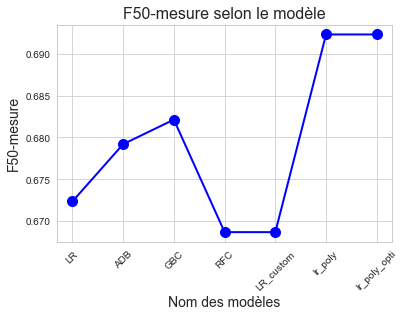

In [275]:
plt.plot(models, tab_fbeta, color='blue',
         linestyle='solid', linewidth=2,
         markerfacecolor='blue', markersize=10,
         marker='o')
plt.title('F50-mesure selon le modèle', fontsize=16)
plt.ylabel('F50-mesure', fontsize=14)
plt.xlabel('Nom des modèles', fontsize=14)
plt.xticks(rotation=45)
plt.show()

<font color = "cyan">Comparaison Aire sous la courbe ROC<i> </i></font>

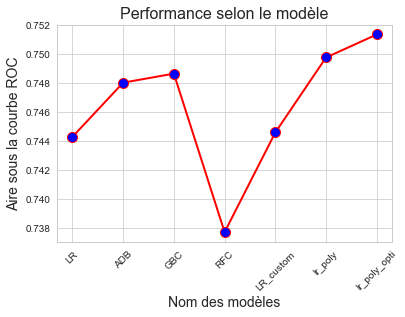

In [276]:
plt.plot(models, tab_auroc, color='red',
         linestyle='solid', linewidth=2,
         markerfacecolor='blue', markersize=10,
         marker='o')
plt.title('Performance selon le modèle', fontsize=16)
plt.ylabel('Aire sous la courbe ROC', fontsize=14)
plt.xlabel('Nom des modèles', fontsize=14)
plt.xticks(rotation=45)
plt.show()

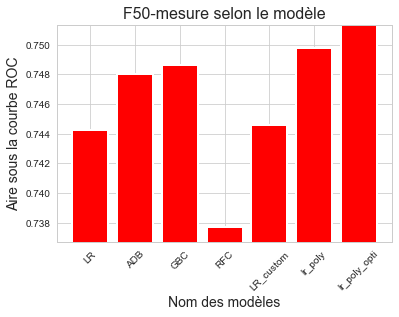

In [277]:
plt.bar(models, tab_auroc, color='red',
         linestyle='solid', linewidth=2,)
plt.title('F50-mesure selon le modèle', fontsize=16)
plt.ylabel('Aire sous la courbe ROC', fontsize=14)
plt.xlabel('Nom des modèles', fontsize=14)
plt.ylim(min(tab_auroc)-0.001,max(tab_auroc))
plt.xticks(rotation=45)
plt.show()

<font color = "cyan">Comparaison F1<i> </i></font>

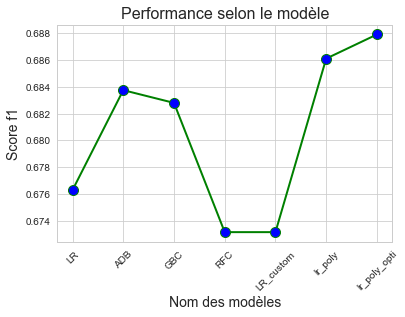

In [278]:

plt.plot(models, tab_f1, color='green',
         linestyle='solid', linewidth=2,
         markerfacecolor='blue', markersize=10,
         marker='o')
plt.title('Performance selon le modèle', fontsize=16)
plt.ylabel('Score f1', fontsize=14)
plt.xlabel('Nom des modèles', fontsize=14)
plt.xticks(rotation=45)
plt.show()

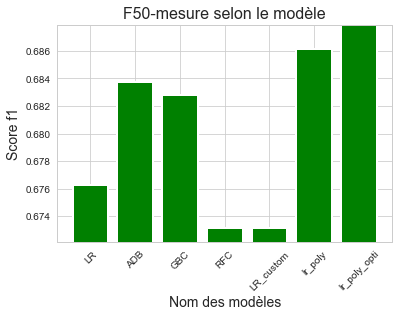

In [279]:
plt.bar(models, tab_f1, color='green',
         linestyle='solid', linewidth=2,)
plt.title('F50-mesure selon le modèle', fontsize=16)
plt.ylabel('Score f1', fontsize=14)
plt.xlabel('Nom des modèles', fontsize=14)
plt.ylim(min(tab_f1)-0.001,max(tab_f1))
plt.xticks(rotation=45)
plt.show()
